# Packages

In [1]:
from hand_func import get_points, handDetector, cut_image_to_rectangle, create_square, small_square
from data_func import clean_Nan_value, get_grayscale, laplace_opencv, show_filtered_data, hog_apply, one_hot_encoding
from tensor_data import count_tensor_data, prepare_image
from count_fingers_cnn import Simple_CNN, train, Advanced_CNN, show_comparision, predict_result
import pandas as pd
import os
import cv2
import torch
from model_prediction import count_acc, count_results
from joblib import dump, load
import numpy as np

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
%reload_ext autoreload

# Dataset

In [4]:
annotation = pd.read_csv(r'train\_annotations.csv')

# Get photos

In [5]:
folder_path = r'train'

def load_image(file_name):
    image_path = os.path.join(folder_path, file_name)
    image = cv2.imread(image_path)
    return image


annotation['image'] = annotation['filename'].apply(load_image)

# Connect two datasets

In [6]:
annotation = annotation.dropna(subset=['image'])

# Show results

In [7]:
annotation

,filename,width,height,class,xmin,ymin,xmax,ymax,image
0,2_141_jpg.rf.ac6593e08df76f1879a9291ad0b48225.jpg,640,480,2,43,100,364,415,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
1,4_193_jpg.rf.aca8d120735b1e2ed7106ccc258c5e06.jpg,640,480,4,25,41,451,396,"[[[1, 0, 4], [1, 0, 4], [1, 0, 4], [1, 0, 4], ..."
2,1_55_jpg.rf.acb1e79c71e47fce6e874d5a6054323c.jpg,640,480,1,211,117,451,480,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
3,3_11_jpg.rf.acb7d948dd8f7c8d663c175e1ee3cc2e.jpg,640,480,3,0,82,407,398,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
4,0_149_jpg.rf.acca3ee23cbedc4e1ba865ce87ed7bfe.jpg,640,480,0,171,134,410,312,"[[[143, 150, 145], [145, 152, 147], [144, 151,..."
...,...,...,...,...,...,...,...,...,...
1719,4_106_jpg.rf.572384212e05208f63013026d65177b5.jpg,640,480,4,60,67,502,480,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
1720,2_151_jpg.rf.571934bb45c2c6e4cfa3d2354228dd1e.jpg,640,480,2,270,151,526,404,"[[[95, 102, 99], [100, 107, 104], [107, 114, 1..."
1722,1_138_jpg.rf.572f5c3c6db898944afbcdc2cd8e48e8.jpg,640,480,1,153,218,553,480,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
1723,0_96_jpg.rf.574130005698161777f953a9af58e483.jpg,640,480,0,81,76,587,420,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."


# Get landmarks and rectangle

In [8]:
detector = handDetector()
annotation['rectangle'] = annotation['image'].apply(lambda img: cut_image_to_rectangle(img, detector))

C:\Users\izaol\PycharmProjects\projektbigdata\venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


In [9]:
annotation['points'] = annotation['image'].apply(lambda img: get_points(detector, img))

C:\Users\izaol\PycharmProjects\projektbigdata\venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


# Get rid of Nan values

In [10]:
annotation = clean_Nan_value(annotation)

C:\Users\izaol\PycharmProjects\projektbigdata\data_func.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['rectangle'] = data['rectangle'].apply(lambda x: np.nan if len(x) == 0 else x)


# Save data

In [11]:
annotation.to_excel('output.xlsx')

# Get square photos

In [12]:
annotation['square'] = annotation['rectangle'].apply(create_square)

In [13]:
annotation = annotation.dropna(subset=['square'])

# Using filters

In [14]:
annotation['square'] = annotation['square'].apply(small_square)

In [15]:
annotation['gray_image'] = annotation['square'].apply(get_grayscale)

annotation['hog_image'] = annotation['square'].apply(hog_apply)

annotation['LoG_image'] = annotation['square'].apply(laplace_opencv)

In [16]:
annotation = annotation.dropna(subset=['gray_image'])
annotation = annotation.dropna(subset=['hog_image'])
annotation = annotation.dropna(subset=['LoG_image'])

# Separate dataframe

In [17]:
gray_data = annotation[['gray_image', 'class']]
hog_data = annotation[['hog_image', 'class']]
LoG_data = annotation[['LoG_image', 'class']]

# Visualisation

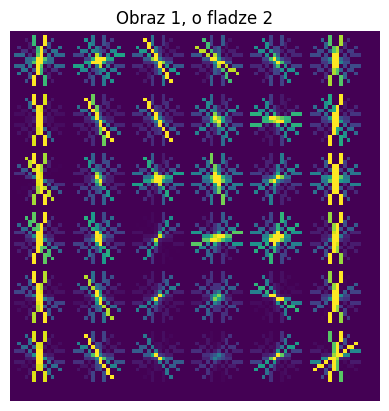

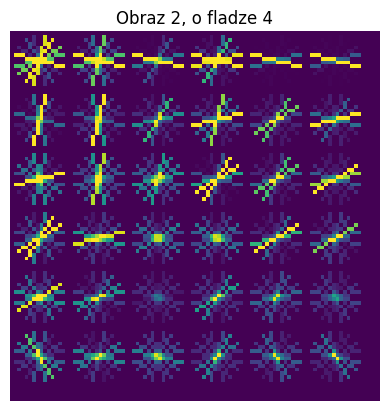

In [18]:
show_filtered_data(hog_data, 'hog_image', 2)

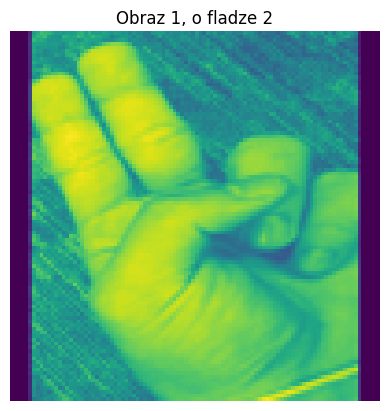

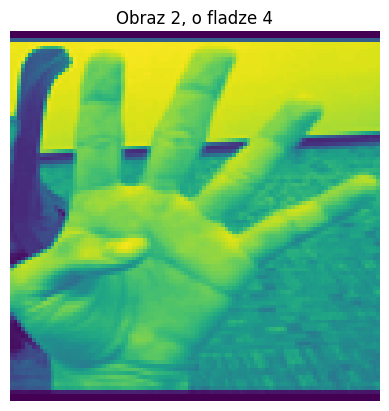

In [19]:
show_filtered_data(gray_data, 'gray_image', 2)

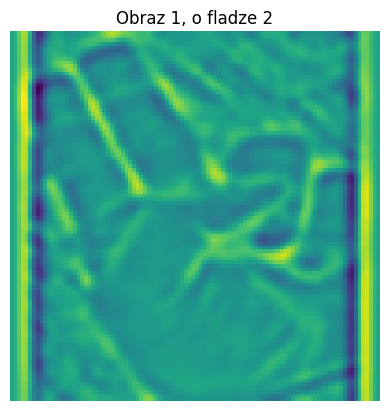

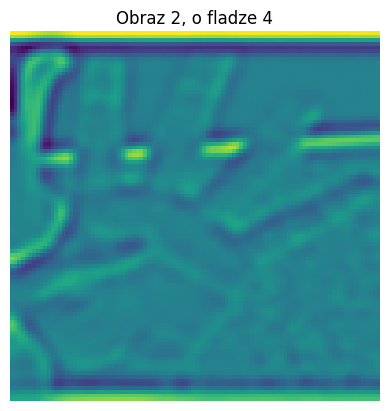

In [20]:
show_filtered_data(LoG_data, 'LoG_image', 2)

# One hot encoding

In [21]:
gray_data = one_hot_encoding(gray_data)
hog_data = one_hot_encoding(hog_data)
LoG_data = one_hot_encoding(LoG_data)

In [22]:
gray_data

,gray_image,class,class_0,class_1,class_2,class_3,class_4,class_5
0,"[[0, 0, 0, 0, 0, 25, 124, 139, 154, 147, 145, ...",2,False,False,True,False,False,False
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",4,False,False,False,False,True,False
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1,False,True,False,False,False,False
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",3,False,False,False,True,False,False
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",0,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...
1719,"[[136, 135, 138, 138, 136, 139, 138, 137, 138,...",4,False,False,False,False,True,False
1720,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 92, 1...",2,False,False,True,False,False,False
1722,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1,False,True,False,False,False,False
1723,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",0,True,False,False,False,False,False


In [23]:
gray_train_loader, gray_val_loader = count_tensor_data(gray_data, 'gray_image', ['class_0', 'class_1', 'class_2', 'class_3', 'class_4', 'class_5'])
LoG_train_loader, LoG_val_loader = count_tensor_data(LoG_data, 'LoG_image', ['class_0', 'class_1', 'class_2', 'class_3', 'class_4', 'class_5'])
hog_train_loader, hog_val_loader = count_tensor_data(hog_data, 'hog_image', ['class_0', 'class_1', 'class_2', 'class_3', 'class_4', 'class_5'])

In [24]:
g_model = Simple_CNN()
g_train_metrics, g_val_metrics, g_best_model = train(g_model, gray_train_loader, gray_val_loader, optimizer=torch.optim.Adam, model_name='Simple-gray-model')

Training:   1%|          | 1/100 [00:03<05:21,  3.25s/it]

Epoch 1/100 - Train Accuracy: 0.1932, Train Loss: 0.0386,Val Accuracy: 0.1948,Val Loss: 0.0484


Training:   2%|▏         | 2/100 [00:06<05:22,  3.29s/it]

Epoch 2/100 - Train Accuracy: 0.1881, Train Loss: 0.0388,Val Accuracy: 0.1948,Val Loss: 0.0514


Training:   3%|▎         | 3/100 [00:08<04:29,  2.78s/it]

Epoch 3/100 - Train Accuracy: 0.1881, Train Loss: 0.0388,Val Accuracy: 0.1948,Val Loss: 0.0484


Training:   4%|▍         | 4/100 [00:10<04:00,  2.51s/it]

Epoch 4/100 - Train Accuracy: 0.1881, Train Loss: 0.0388,Val Accuracy: 0.1948,Val Loss: 0.0499


Training:   5%|▌         | 5/100 [00:12<03:44,  2.36s/it]

Epoch 5/100 - Train Accuracy: 0.1881, Train Loss: 0.0388,Val Accuracy: 0.1948,Val Loss: 0.0499


Training:   6%|▌         | 6/100 [00:15<03:35,  2.29s/it]

Epoch 6/100 - Train Accuracy: 0.1881, Train Loss: 0.0388,Val Accuracy: 0.1948,Val Loss: 0.0484


Training:   7%|▋         | 7/100 [00:17<03:30,  2.26s/it]

Epoch 7/100 - Train Accuracy: 0.1881, Train Loss: 0.0388,Val Accuracy: 0.1948,Val Loss: 0.0499


Training:   8%|▊         | 8/100 [00:19<03:27,  2.26s/it]

Epoch 8/100 - Train Accuracy: 0.1881, Train Loss: 0.0388,Val Accuracy: 0.1948,Val Loss: 0.0499


Training:   9%|▉         | 9/100 [00:21<03:23,  2.24s/it]

Epoch 9/100 - Train Accuracy: 0.1881, Train Loss: 0.0388,Val Accuracy: 0.1948,Val Loss: 0.0514


Training:  10%|█         | 10/100 [00:23<03:18,  2.21s/it]

Epoch 10/100 - Train Accuracy: 0.1881, Train Loss: 0.0388,Val Accuracy: 0.1948,Val Loss: 0.0484


Training:  11%|█         | 11/100 [00:26<03:14,  2.19s/it]

Epoch 11/100 - Train Accuracy: 0.1881, Train Loss: 0.0387,Val Accuracy: 0.1948,Val Loss: 0.0484


Training:  12%|█▏        | 12/100 [00:28<03:10,  2.16s/it]

Epoch 12/100 - Train Accuracy: 0.1881, Train Loss: 0.0388,Val Accuracy: 0.1948,Val Loss: 0.0469


Training:  13%|█▎        | 13/100 [00:30<03:06,  2.14s/it]

Epoch 13/100 - Train Accuracy: 0.1881, Train Loss: 0.0387,Val Accuracy: 0.1948,Val Loss: 0.0484


Training:  14%|█▍        | 14/100 [00:32<03:02,  2.12s/it]

Epoch 14/100 - Train Accuracy: 0.1881, Train Loss: 0.0388,Val Accuracy: 0.1948,Val Loss: 0.0484


Training:  15%|█▌        | 15/100 [00:34<02:59,  2.12s/it]

Epoch 15/100 - Train Accuracy: 0.1881, Train Loss: 0.0388,Val Accuracy: 0.1948,Val Loss: 0.0514


Training:  16%|█▌        | 16/100 [00:36<02:58,  2.12s/it]

Epoch 16/100 - Train Accuracy: 0.1881, Train Loss: 0.0388,Val Accuracy: 0.1948,Val Loss: 0.0499


Training:  17%|█▋        | 17/100 [00:38<02:55,  2.12s/it]

Epoch 17/100 - Train Accuracy: 0.1881, Train Loss: 0.0387,Val Accuracy: 0.1948,Val Loss: 0.0499


Training:  18%|█▊        | 18/100 [00:40<02:53,  2.12s/it]

Epoch 18/100 - Train Accuracy: 0.1881, Train Loss: 0.0388,Val Accuracy: 0.1948,Val Loss: 0.0514


Training:  19%|█▉        | 19/100 [00:42<02:51,  2.12s/it]

Epoch 19/100 - Train Accuracy: 0.1881, Train Loss: 0.0388,Val Accuracy: 0.1948,Val Loss: 0.0484


Training:  20%|██        | 20/100 [00:45<02:49,  2.12s/it]

Epoch 20/100 - Train Accuracy: 0.1881, Train Loss: 0.0388,Val Accuracy: 0.1948,Val Loss: 0.0499


Training:  21%|██        | 21/100 [00:47<02:47,  2.13s/it]

Epoch 21/100 - Train Accuracy: 0.1881, Train Loss: 0.0387,Val Accuracy: 0.1948,Val Loss: 0.0499


Training:  22%|██▏       | 22/100 [00:49<02:45,  2.12s/it]

Epoch 22/100 - Train Accuracy: 0.1881, Train Loss: 0.0388,Val Accuracy: 0.1948,Val Loss: 0.0469


Training:  23%|██▎       | 23/100 [00:51<02:43,  2.13s/it]

Epoch 23/100 - Train Accuracy: 0.1881, Train Loss: 0.0388,Val Accuracy: 0.1948,Val Loss: 0.0484


Training:  24%|██▍       | 24/100 [00:53<02:41,  2.13s/it]

Epoch 24/100 - Train Accuracy: 0.1881, Train Loss: 0.0388,Val Accuracy: 0.1948,Val Loss: 0.0514


Training:  25%|██▌       | 25/100 [00:55<02:42,  2.16s/it]

Epoch 25/100 - Train Accuracy: 0.1881, Train Loss: 0.0388,Val Accuracy: 0.1948,Val Loss: 0.0499


Training:  26%|██▌       | 26/100 [00:57<02:39,  2.16s/it]

Epoch 26/100 - Train Accuracy: 0.1881, Train Loss: 0.0388,Val Accuracy: 0.1948,Val Loss: 0.0499


Training:  27%|██▋       | 27/100 [01:00<02:38,  2.17s/it]

Epoch 27/100 - Train Accuracy: 0.1881, Train Loss: 0.0388,Val Accuracy: 0.1948,Val Loss: 0.0484


Training:  28%|██▊       | 28/100 [01:02<02:36,  2.17s/it]

Epoch 28/100 - Train Accuracy: 0.1881, Train Loss: 0.0388,Val Accuracy: 0.1948,Val Loss: 0.0514


Training:  29%|██▉       | 29/100 [01:04<02:34,  2.18s/it]

Epoch 29/100 - Train Accuracy: 0.1881, Train Loss: 0.0388,Val Accuracy: 0.1948,Val Loss: 0.0499


Training:  30%|███       | 30/100 [01:06<02:33,  2.19s/it]

Epoch 30/100 - Train Accuracy: 0.1881, Train Loss: 0.0388,Val Accuracy: 0.1948,Val Loss: 0.0469


Training:  31%|███       | 31/100 [01:08<02:30,  2.19s/it]

Epoch 31/100 - Train Accuracy: 0.1881, Train Loss: 0.0388,Val Accuracy: 0.1948,Val Loss: 0.0484


Training:  32%|███▏      | 32/100 [01:11<02:28,  2.19s/it]

Epoch 32/100 - Train Accuracy: 0.1881, Train Loss: 0.0388,Val Accuracy: 0.1948,Val Loss: 0.0484


Training:  33%|███▎      | 33/100 [01:13<02:27,  2.20s/it]

Epoch 33/100 - Train Accuracy: 0.1881, Train Loss: 0.0388,Val Accuracy: 0.1948,Val Loss: 0.0499


Training:  34%|███▍      | 34/100 [01:15<02:25,  2.21s/it]

Epoch 34/100 - Train Accuracy: 0.1881, Train Loss: 0.0388,Val Accuracy: 0.1948,Val Loss: 0.0469


Training:  35%|███▌      | 35/100 [01:17<02:23,  2.20s/it]

Epoch 35/100 - Train Accuracy: 0.1881, Train Loss: 0.0388,Val Accuracy: 0.1948,Val Loss: 0.0454


Training:  36%|███▌      | 36/100 [01:19<02:20,  2.20s/it]

Epoch 36/100 - Train Accuracy: 0.1881, Train Loss: 0.0388,Val Accuracy: 0.1948,Val Loss: 0.0469


Training:  37%|███▋      | 37/100 [01:22<02:19,  2.21s/it]

Epoch 37/100 - Train Accuracy: 0.1881, Train Loss: 0.0388,Val Accuracy: 0.1948,Val Loss: 0.0499


Training:  38%|███▊      | 38/100 [01:24<02:17,  2.22s/it]

Epoch 38/100 - Train Accuracy: 0.1881, Train Loss: 0.0388,Val Accuracy: 0.1948,Val Loss: 0.0499


Training:  39%|███▉      | 39/100 [01:26<02:15,  2.22s/it]

Epoch 39/100 - Train Accuracy: 0.1881, Train Loss: 0.0387,Val Accuracy: 0.1948,Val Loss: 0.0499


Training:  40%|████      | 40/100 [01:28<02:12,  2.21s/it]

Epoch 40/100 - Train Accuracy: 0.1881, Train Loss: 0.0388,Val Accuracy: 0.1948,Val Loss: 0.0484


Training:  41%|████      | 41/100 [01:30<02:09,  2.20s/it]

Epoch 41/100 - Train Accuracy: 0.1881, Train Loss: 0.0388,Val Accuracy: 0.1948,Val Loss: 0.0499


Training:  42%|████▏     | 42/100 [01:33<02:07,  2.20s/it]

Epoch 42/100 - Train Accuracy: 0.1881, Train Loss: 0.0388,Val Accuracy: 0.1948,Val Loss: 0.0469


Training:  43%|████▎     | 43/100 [01:35<02:05,  2.21s/it]

Epoch 43/100 - Train Accuracy: 0.1881, Train Loss: 0.0388,Val Accuracy: 0.1948,Val Loss: 0.0499


Training:  44%|████▍     | 44/100 [01:37<02:03,  2.21s/it]

Epoch 44/100 - Train Accuracy: 0.1881, Train Loss: 0.0387,Val Accuracy: 0.1948,Val Loss: 0.0499


Training:  45%|████▌     | 45/100 [01:39<02:01,  2.20s/it]

Epoch 45/100 - Train Accuracy: 0.1881, Train Loss: 0.0388,Val Accuracy: 0.1948,Val Loss: 0.0499


Training:  46%|████▌     | 46/100 [01:41<01:58,  2.20s/it]

Epoch 46/100 - Train Accuracy: 0.1881, Train Loss: 0.0388,Val Accuracy: 0.1948,Val Loss: 0.0484


Training:  47%|████▋     | 47/100 [01:44<01:56,  2.20s/it]

Epoch 47/100 - Train Accuracy: 0.1881, Train Loss: 0.0388,Val Accuracy: 0.1948,Val Loss: 0.0514


Training:  48%|████▊     | 48/100 [01:46<01:54,  2.21s/it]

Epoch 48/100 - Train Accuracy: 0.1881, Train Loss: 0.0388,Val Accuracy: 0.1948,Val Loss: 0.0484


Training:  49%|████▉     | 49/100 [01:48<01:52,  2.21s/it]

Epoch 49/100 - Train Accuracy: 0.1881, Train Loss: 0.0388,Val Accuracy: 0.1948,Val Loss: 0.0484


Training:  50%|█████     | 50/100 [01:50<01:50,  2.20s/it]

Epoch 50/100 - Train Accuracy: 0.1881, Train Loss: 0.0388,Val Accuracy: 0.1948,Val Loss: 0.0454


Training:  51%|█████     | 51/100 [01:53<01:50,  2.26s/it]

Epoch 51/100 - Train Accuracy: 0.1881, Train Loss: 0.0388,Val Accuracy: 0.1948,Val Loss: 0.0469


Training:  52%|█████▏    | 52/100 [01:56<02:08,  2.68s/it]

Epoch 52/100 - Train Accuracy: 0.1881, Train Loss: 0.0388,Val Accuracy: 0.1948,Val Loss: 0.0499


Training:  53%|█████▎    | 53/100 [01:59<01:59,  2.55s/it]

Epoch 53/100 - Train Accuracy: 0.1881, Train Loss: 0.0388,Val Accuracy: 0.1948,Val Loss: 0.0484


Training:  54%|█████▍    | 54/100 [02:01<01:52,  2.44s/it]

Epoch 54/100 - Train Accuracy: 0.1881, Train Loss: 0.0388,Val Accuracy: 0.1948,Val Loss: 0.0499


Training:  55%|█████▌    | 55/100 [02:03<01:46,  2.38s/it]

Epoch 55/100 - Train Accuracy: 0.1881, Train Loss: 0.0388,Val Accuracy: 0.1948,Val Loss: 0.0469


Training:  56%|█████▌    | 56/100 [02:06<01:52,  2.55s/it]

Epoch 56/100 - Train Accuracy: 0.1881, Train Loss: 0.0388,Val Accuracy: 0.1948,Val Loss: 0.0499


Training:  57%|█████▋    | 57/100 [02:08<01:46,  2.48s/it]

Epoch 57/100 - Train Accuracy: 0.1881, Train Loss: 0.0388,Val Accuracy: 0.1948,Val Loss: 0.0484


Training:  58%|█████▊    | 58/100 [02:12<01:55,  2.75s/it]

Epoch 58/100 - Train Accuracy: 0.1881, Train Loss: 0.0388,Val Accuracy: 0.1948,Val Loss: 0.0499


Training:  59%|█████▉    | 59/100 [02:14<01:51,  2.72s/it]

Epoch 59/100 - Train Accuracy: 0.1881, Train Loss: 0.0388,Val Accuracy: 0.1948,Val Loss: 0.0514


Training:  60%|██████    | 60/100 [02:17<01:52,  2.81s/it]

Epoch 60/100 - Train Accuracy: 0.1881, Train Loss: 0.0388,Val Accuracy: 0.1948,Val Loss: 0.0499


Training:  61%|██████    | 61/100 [02:20<01:49,  2.80s/it]

Epoch 61/100 - Train Accuracy: 0.1881, Train Loss: 0.0388,Val Accuracy: 0.1948,Val Loss: 0.0499


Training:  62%|██████▏   | 62/100 [02:23<01:47,  2.82s/it]

Epoch 62/100 - Train Accuracy: 0.1881, Train Loss: 0.0388,Val Accuracy: 0.1948,Val Loss: 0.0499


Training:  63%|██████▎   | 63/100 [02:26<01:45,  2.86s/it]

Epoch 63/100 - Train Accuracy: 0.1881, Train Loss: 0.0388,Val Accuracy: 0.1948,Val Loss: 0.0499


Training:  64%|██████▍   | 64/100 [02:29<01:49,  3.06s/it]

Epoch 64/100 - Train Accuracy: 0.1881, Train Loss: 0.0388,Val Accuracy: 0.1948,Val Loss: 0.0499


Training:  65%|██████▌   | 65/100 [02:33<01:47,  3.07s/it]

Epoch 65/100 - Train Accuracy: 0.1881, Train Loss: 0.0387,Val Accuracy: 0.1948,Val Loss: 0.0484


Training:  66%|██████▌   | 66/100 [02:35<01:39,  2.93s/it]

Epoch 66/100 - Train Accuracy: 0.1881, Train Loss: 0.0388,Val Accuracy: 0.1948,Val Loss: 0.0499


Training:  67%|██████▋   | 67/100 [02:38<01:32,  2.81s/it]

Epoch 67/100 - Train Accuracy: 0.1881, Train Loss: 0.0389,Val Accuracy: 0.1948,Val Loss: 0.0499


Training:  68%|██████▊   | 68/100 [02:40<01:27,  2.75s/it]

Epoch 68/100 - Train Accuracy: 0.1881, Train Loss: 0.0388,Val Accuracy: 0.1948,Val Loss: 0.0499


Training:  69%|██████▉   | 69/100 [02:43<01:22,  2.67s/it]

Epoch 69/100 - Train Accuracy: 0.1881, Train Loss: 0.0388,Val Accuracy: 0.1948,Val Loss: 0.0484


Training:  70%|███████   | 70/100 [02:45<01:17,  2.58s/it]

Epoch 70/100 - Train Accuracy: 0.1881, Train Loss: 0.0388,Val Accuracy: 0.1948,Val Loss: 0.0514


Training:  71%|███████   | 71/100 [02:47<01:12,  2.50s/it]

Epoch 71/100 - Train Accuracy: 0.1881, Train Loss: 0.0388,Val Accuracy: 0.1948,Val Loss: 0.0499


Training:  72%|███████▏  | 72/100 [02:50<01:08,  2.45s/it]

Epoch 72/100 - Train Accuracy: 0.1881, Train Loss: 0.0388,Val Accuracy: 0.1948,Val Loss: 0.0514


Training:  73%|███████▎  | 73/100 [02:52<01:04,  2.40s/it]

Epoch 73/100 - Train Accuracy: 0.1881, Train Loss: 0.0388,Val Accuracy: 0.1948,Val Loss: 0.0469


Training:  74%|███████▍  | 74/100 [02:54<01:01,  2.38s/it]

Epoch 74/100 - Train Accuracy: 0.1881, Train Loss: 0.0388,Val Accuracy: 0.1948,Val Loss: 0.0484


Training:  75%|███████▌  | 75/100 [02:57<01:00,  2.43s/it]

Epoch 75/100 - Train Accuracy: 0.1881, Train Loss: 0.0388,Val Accuracy: 0.1948,Val Loss: 0.0484


Training:  76%|███████▌  | 76/100 [02:59<00:58,  2.42s/it]

Epoch 76/100 - Train Accuracy: 0.1881, Train Loss: 0.0388,Val Accuracy: 0.1948,Val Loss: 0.0499


Training:  77%|███████▋  | 77/100 [03:03<01:01,  2.66s/it]

Epoch 77/100 - Train Accuracy: 0.1881, Train Loss: 0.0388,Val Accuracy: 0.1948,Val Loss: 0.0499


Training:  78%|███████▊  | 78/100 [03:05<00:57,  2.61s/it]

Epoch 78/100 - Train Accuracy: 0.1881, Train Loss: 0.0388,Val Accuracy: 0.1948,Val Loss: 0.0514


Training:  79%|███████▉  | 79/100 [03:07<00:53,  2.53s/it]

Epoch 79/100 - Train Accuracy: 0.1881, Train Loss: 0.0388,Val Accuracy: 0.1948,Val Loss: 0.0499


Training:  80%|████████  | 80/100 [03:11<00:59,  3.00s/it]

Epoch 80/100 - Train Accuracy: 0.1881, Train Loss: 0.0387,Val Accuracy: 0.1948,Val Loss: 0.0484


Training:  81%|████████  | 81/100 [03:14<00:54,  2.86s/it]

Epoch 81/100 - Train Accuracy: 0.1881, Train Loss: 0.0388,Val Accuracy: 0.1948,Val Loss: 0.0484


Training:  82%|████████▏ | 82/100 [03:17<00:52,  2.89s/it]

Epoch 82/100 - Train Accuracy: 0.1881, Train Loss: 0.0387,Val Accuracy: 0.1948,Val Loss: 0.0514


Training:  83%|████████▎ | 83/100 [03:20<00:51,  3.04s/it]

Epoch 83/100 - Train Accuracy: 0.1881, Train Loss: 0.0388,Val Accuracy: 0.1948,Val Loss: 0.0499


Training:  84%|████████▍ | 84/100 [03:24<00:52,  3.30s/it]

Epoch 84/100 - Train Accuracy: 0.1881, Train Loss: 0.0388,Val Accuracy: 0.1948,Val Loss: 0.0484


Training:  85%|████████▌ | 85/100 [03:27<00:47,  3.19s/it]

Epoch 85/100 - Train Accuracy: 0.1881, Train Loss: 0.0387,Val Accuracy: 0.1948,Val Loss: 0.0499


Training:  86%|████████▌ | 86/100 [03:30<00:43,  3.09s/it]

Epoch 86/100 - Train Accuracy: 0.1881, Train Loss: 0.0388,Val Accuracy: 0.1948,Val Loss: 0.0499


Training:  87%|████████▋ | 87/100 [03:33<00:39,  3.01s/it]

Epoch 87/100 - Train Accuracy: 0.1881, Train Loss: 0.0388,Val Accuracy: 0.1948,Val Loss: 0.0499


Training:  88%|████████▊ | 88/100 [03:36<00:34,  2.91s/it]

Epoch 88/100 - Train Accuracy: 0.1881, Train Loss: 0.0388,Val Accuracy: 0.1948,Val Loss: 0.0484


Training:  89%|████████▉ | 89/100 [03:39<00:33,  3.01s/it]

Epoch 89/100 - Train Accuracy: 0.1881, Train Loss: 0.0388,Val Accuracy: 0.1948,Val Loss: 0.0499


Training:  90%|█████████ | 90/100 [03:42<00:29,  2.92s/it]

Epoch 90/100 - Train Accuracy: 0.1881, Train Loss: 0.0388,Val Accuracy: 0.1948,Val Loss: 0.0469


Training:  91%|█████████ | 91/100 [03:45<00:26,  2.96s/it]

Epoch 91/100 - Train Accuracy: 0.1881, Train Loss: 0.0388,Val Accuracy: 0.1948,Val Loss: 0.0469


Training:  92%|█████████▏| 92/100 [03:47<00:22,  2.76s/it]

Epoch 92/100 - Train Accuracy: 0.1881, Train Loss: 0.0388,Val Accuracy: 0.1948,Val Loss: 0.0514


Training:  93%|█████████▎| 93/100 [03:49<00:18,  2.61s/it]

Epoch 93/100 - Train Accuracy: 0.1881, Train Loss: 0.0388,Val Accuracy: 0.1948,Val Loss: 0.0469


Training:  94%|█████████▍| 94/100 [03:51<00:15,  2.52s/it]

Epoch 94/100 - Train Accuracy: 0.1881, Train Loss: 0.0387,Val Accuracy: 0.1948,Val Loss: 0.0499


Training:  95%|█████████▌| 95/100 [03:54<00:12,  2.45s/it]

Epoch 95/100 - Train Accuracy: 0.1881, Train Loss: 0.0388,Val Accuracy: 0.1948,Val Loss: 0.0514


Training:  96%|█████████▌| 96/100 [03:56<00:09,  2.39s/it]

Epoch 96/100 - Train Accuracy: 0.1881, Train Loss: 0.0388,Val Accuracy: 0.1948,Val Loss: 0.0499


Training:  97%|█████████▋| 97/100 [03:58<00:07,  2.34s/it]

Epoch 97/100 - Train Accuracy: 0.1881, Train Loss: 0.0388,Val Accuracy: 0.1948,Val Loss: 0.0499


Training:  98%|█████████▊| 98/100 [04:00<00:04,  2.31s/it]

Epoch 98/100 - Train Accuracy: 0.1881, Train Loss: 0.0388,Val Accuracy: 0.1948,Val Loss: 0.0454


Training:  99%|█████████▉| 99/100 [04:03<00:02,  2.28s/it]

Epoch 99/100 - Train Accuracy: 0.1881, Train Loss: 0.0388,Val Accuracy: 0.1948,Val Loss: 0.0514


Training: 100%|██████████| 100/100 [04:05<00:00,  2.45s/it]

Epoch 100/100 - Train Accuracy: 0.1881, Train Loss: 0.0388,Val Accuracy: 0.1948,Val Loss: 0.0499


In [25]:
h_model = Simple_CNN()
h_train_metrics, h_val_metrics, h_best_model = train(h_model, hog_train_loader, hog_val_loader, model_name ='Simple-HoG-model')

Training:   1%|          | 1/100 [00:02<03:39,  2.22s/it]

Epoch 1/100 - Train Accuracy: 0.3696, Train Loss: 0.0330,Val Accuracy: 0.4545,Val Loss: 0.0391


Training:   2%|▏         | 2/100 [00:04<03:38,  2.23s/it]

Epoch 2/100 - Train Accuracy: 0.5752, Train Loss: 0.0286,Val Accuracy: 0.6299,Val Loss: 0.0349


Training:   3%|▎         | 3/100 [00:06<03:36,  2.23s/it]

Epoch 3/100 - Train Accuracy: 0.6674, Train Loss: 0.0267,Val Accuracy: 0.7078,Val Loss: 0.0343


Training:   4%|▍         | 4/100 [00:08<03:33,  2.22s/it]

Epoch 4/100 - Train Accuracy: 0.6812, Train Loss: 0.0258,Val Accuracy: 0.6234,Val Loss: 0.0330


Training:   5%|▌         | 5/100 [00:11<03:32,  2.24s/it]

Epoch 5/100 - Train Accuracy: 0.7262, Train Loss: 0.0251,Val Accuracy: 0.7338,Val Loss: 0.0335


Training:   6%|▌         | 6/100 [00:13<03:29,  2.23s/it]

Epoch 6/100 - Train Accuracy: 0.7502, Train Loss: 0.0245,Val Accuracy: 0.7208,Val Loss: 0.0307


Training:   7%|▋         | 7/100 [00:15<03:27,  2.23s/it]

Epoch 7/100 - Train Accuracy: 0.7451, Train Loss: 0.0245,Val Accuracy: 0.7532,Val Loss: 0.0312


Training:   8%|▊         | 8/100 [00:17<03:26,  2.25s/it]

Epoch 8/100 - Train Accuracy: 0.7988, Train Loss: 0.0241,Val Accuracy: 0.7403,Val Loss: 0.0313


Training:   9%|▉         | 9/100 [00:20<03:24,  2.25s/it]

Epoch 9/100 - Train Accuracy: 0.8068, Train Loss: 0.0239,Val Accuracy: 0.8052,Val Loss: 0.0350


Training:  10%|█         | 10/100 [00:22<03:22,  2.25s/it]

Epoch 10/100 - Train Accuracy: 0.8322, Train Loss: 0.0237,Val Accuracy: 0.7922,Val Loss: 0.0309


Training:  11%|█         | 11/100 [00:24<03:23,  2.29s/it]

Epoch 11/100 - Train Accuracy: 0.8402, Train Loss: 0.0237,Val Accuracy: 0.8442,Val Loss: 0.0304


Training:  12%|█▏        | 12/100 [00:27<03:41,  2.52s/it]

Epoch 12/100 - Train Accuracy: 0.8816, Train Loss: 0.0232,Val Accuracy: 0.8636,Val Loss: 0.0304


Training:  13%|█▎        | 13/100 [00:30<03:42,  2.56s/it]

Epoch 13/100 - Train Accuracy: 0.8954, Train Loss: 0.0231,Val Accuracy: 0.8247,Val Loss: 0.0317


Training:  14%|█▍        | 14/100 [00:32<03:34,  2.50s/it]

Epoch 14/100 - Train Accuracy: 0.9027, Train Loss: 0.0228,Val Accuracy: 0.8312,Val Loss: 0.0317


Training:  15%|█▌        | 15/100 [00:35<03:26,  2.43s/it]

Epoch 15/100 - Train Accuracy: 0.8932, Train Loss: 0.0229,Val Accuracy: 0.8766,Val Loss: 0.0304


Training:  16%|█▌        | 16/100 [00:37<03:22,  2.42s/it]

Epoch 16/100 - Train Accuracy: 0.9208, Train Loss: 0.0227,Val Accuracy: 0.8312,Val Loss: 0.0305


Training:  17%|█▋        | 17/100 [00:39<03:20,  2.41s/it]

Epoch 17/100 - Train Accuracy: 0.9245, Train Loss: 0.0225,Val Accuracy: 0.8896,Val Loss: 0.0290


Training:  18%|█▊        | 18/100 [00:42<03:15,  2.38s/it]

Epoch 18/100 - Train Accuracy: 0.9223, Train Loss: 0.0226,Val Accuracy: 0.8766,Val Loss: 0.0294


Training:  19%|█▉        | 19/100 [00:44<03:10,  2.36s/it]

Epoch 19/100 - Train Accuracy: 0.9288, Train Loss: 0.0223,Val Accuracy: 0.8896,Val Loss: 0.0296


Training:  20%|██        | 20/100 [00:47<03:12,  2.41s/it]

Epoch 20/100 - Train Accuracy: 0.9310, Train Loss: 0.0223,Val Accuracy: 0.8571,Val Loss: 0.0296


Training:  21%|██        | 21/100 [00:49<03:09,  2.40s/it]

Epoch 21/100 - Train Accuracy: 0.9325, Train Loss: 0.0224,Val Accuracy: 0.8766,Val Loss: 0.0293


Training:  22%|██▏       | 22/100 [00:51<03:07,  2.40s/it]

Epoch 22/100 - Train Accuracy: 0.9397, Train Loss: 0.0221,Val Accuracy: 0.9026,Val Loss: 0.0293


Training:  23%|██▎       | 23/100 [00:54<03:02,  2.36s/it]

Epoch 23/100 - Train Accuracy: 0.9419, Train Loss: 0.0221,Val Accuracy: 0.8961,Val Loss: 0.0289


Training:  24%|██▍       | 24/100 [00:56<02:59,  2.36s/it]

Epoch 24/100 - Train Accuracy: 0.9463, Train Loss: 0.0222,Val Accuracy: 0.9026,Val Loss: 0.0292


Training:  25%|██▌       | 25/100 [00:58<02:57,  2.36s/it]

Epoch 25/100 - Train Accuracy: 0.9470, Train Loss: 0.0221,Val Accuracy: 0.9026,Val Loss: 0.0289


Training:  26%|██▌       | 26/100 [01:01<02:56,  2.39s/it]

Epoch 26/100 - Train Accuracy: 0.9528, Train Loss: 0.0221,Val Accuracy: 0.9156,Val Loss: 0.0308


Training:  27%|██▋       | 27/100 [01:03<02:54,  2.40s/it]

Epoch 27/100 - Train Accuracy: 0.9419, Train Loss: 0.0221,Val Accuracy: 0.9156,Val Loss: 0.0292


Training:  28%|██▊       | 28/100 [01:06<03:01,  2.52s/it]

Epoch 28/100 - Train Accuracy: 0.9564, Train Loss: 0.0219,Val Accuracy: 0.9091,Val Loss: 0.0300


Training:  29%|██▉       | 29/100 [01:09<03:09,  2.67s/it]

Epoch 29/100 - Train Accuracy: 0.9601, Train Loss: 0.0218,Val Accuracy: 0.9221,Val Loss: 0.0288


Training:  30%|███       | 30/100 [01:12<03:11,  2.74s/it]

Epoch 30/100 - Train Accuracy: 0.9608, Train Loss: 0.0218,Val Accuracy: 0.9026,Val Loss: 0.0289


Training:  31%|███       | 31/100 [01:15<03:15,  2.84s/it]

Epoch 31/100 - Train Accuracy: 0.9622, Train Loss: 0.0217,Val Accuracy: 0.9286,Val Loss: 0.0297


Training:  32%|███▏      | 32/100 [01:18<03:22,  2.98s/it]

Epoch 32/100 - Train Accuracy: 0.9651, Train Loss: 0.0218,Val Accuracy: 0.9221,Val Loss: 0.0285


Training:  33%|███▎      | 33/100 [01:22<03:26,  3.08s/it]

Epoch 33/100 - Train Accuracy: 0.9659, Train Loss: 0.0217,Val Accuracy: 0.9221,Val Loss: 0.0286


Training:  34%|███▍      | 34/100 [01:24<03:08,  2.85s/it]

Epoch 34/100 - Train Accuracy: 0.9659, Train Loss: 0.0217,Val Accuracy: 0.9286,Val Loss: 0.0286


Training:  35%|███▌      | 35/100 [01:26<02:54,  2.69s/it]

Epoch 35/100 - Train Accuracy: 0.9659, Train Loss: 0.0217,Val Accuracy: 0.9286,Val Loss: 0.0287


Training:  36%|███▌      | 36/100 [01:29<02:45,  2.58s/it]

Epoch 36/100 - Train Accuracy: 0.9651, Train Loss: 0.0217,Val Accuracy: 0.9221,Val Loss: 0.0295


Training:  37%|███▋      | 37/100 [01:31<02:38,  2.52s/it]

Epoch 37/100 - Train Accuracy: 0.9601, Train Loss: 0.0218,Val Accuracy: 0.8701,Val Loss: 0.0303


Training:  38%|███▊      | 38/100 [01:33<02:31,  2.45s/it]

Epoch 38/100 - Train Accuracy: 0.9615, Train Loss: 0.0219,Val Accuracy: 0.9091,Val Loss: 0.0288


Training:  39%|███▉      | 39/100 [01:36<02:26,  2.41s/it]

Epoch 39/100 - Train Accuracy: 0.9601, Train Loss: 0.0219,Val Accuracy: 0.9286,Val Loss: 0.0286


Training:  40%|████      | 40/100 [01:38<02:22,  2.37s/it]

Epoch 40/100 - Train Accuracy: 0.9659, Train Loss: 0.0218,Val Accuracy: 0.9286,Val Loss: 0.0284


Training:  41%|████      | 41/100 [01:40<02:19,  2.36s/it]

Epoch 41/100 - Train Accuracy: 0.9637, Train Loss: 0.0218,Val Accuracy: 0.9286,Val Loss: 0.0301


Training:  42%|████▏     | 42/100 [01:42<02:15,  2.34s/it]

Epoch 42/100 - Train Accuracy: 0.9680, Train Loss: 0.0217,Val Accuracy: 0.9221,Val Loss: 0.0289


Training:  43%|████▎     | 43/100 [01:45<02:12,  2.33s/it]

Epoch 43/100 - Train Accuracy: 0.9601, Train Loss: 0.0219,Val Accuracy: 0.9156,Val Loss: 0.0286


Training:  44%|████▍     | 44/100 [01:47<02:10,  2.32s/it]

Epoch 44/100 - Train Accuracy: 0.9586, Train Loss: 0.0219,Val Accuracy: 0.9156,Val Loss: 0.0286


Training:  45%|████▌     | 45/100 [01:49<02:07,  2.32s/it]

Epoch 45/100 - Train Accuracy: 0.9710, Train Loss: 0.0218,Val Accuracy: 0.8831,Val Loss: 0.0306


Training:  46%|████▌     | 46/100 [01:52<02:06,  2.33s/it]

Epoch 46/100 - Train Accuracy: 0.9710, Train Loss: 0.0218,Val Accuracy: 0.9351,Val Loss: 0.0289


Training:  47%|████▋     | 47/100 [01:54<02:03,  2.33s/it]

Epoch 47/100 - Train Accuracy: 0.9659, Train Loss: 0.0218,Val Accuracy: 0.9091,Val Loss: 0.0289


Training:  48%|████▊     | 48/100 [01:56<02:00,  2.32s/it]

Epoch 48/100 - Train Accuracy: 0.9666, Train Loss: 0.0217,Val Accuracy: 0.8961,Val Loss: 0.0292


Training:  49%|████▉     | 49/100 [01:59<01:57,  2.31s/it]

Epoch 49/100 - Train Accuracy: 0.9651, Train Loss: 0.0218,Val Accuracy: 0.8961,Val Loss: 0.0297


Training:  50%|█████     | 50/100 [02:01<01:55,  2.32s/it]

Epoch 50/100 - Train Accuracy: 0.9688, Train Loss: 0.0217,Val Accuracy: 0.8961,Val Loss: 0.0286


Training:  51%|█████     | 51/100 [02:03<01:53,  2.32s/it]

Epoch 51/100 - Train Accuracy: 0.9688, Train Loss: 0.0218,Val Accuracy: 0.9091,Val Loss: 0.0302


Training:  52%|█████▏    | 52/100 [02:06<01:50,  2.31s/it]

Epoch 52/100 - Train Accuracy: 0.9593, Train Loss: 0.0219,Val Accuracy: 0.9026,Val Loss: 0.0292


Training:  53%|█████▎    | 53/100 [02:08<01:48,  2.31s/it]

Epoch 53/100 - Train Accuracy: 0.9521, Train Loss: 0.0220,Val Accuracy: 0.9221,Val Loss: 0.0291


Training:  54%|█████▍    | 54/100 [02:10<01:46,  2.31s/it]

Epoch 54/100 - Train Accuracy: 0.9659, Train Loss: 0.0218,Val Accuracy: 0.9481,Val Loss: 0.0285


Training:  55%|█████▌    | 55/100 [02:13<01:43,  2.31s/it]

Epoch 55/100 - Train Accuracy: 0.9593, Train Loss: 0.0219,Val Accuracy: 0.9416,Val Loss: 0.0285


Training:  56%|█████▌    | 56/100 [02:15<01:41,  2.30s/it]

Epoch 56/100 - Train Accuracy: 0.9731, Train Loss: 0.0217,Val Accuracy: 0.9416,Val Loss: 0.0297


Training:  57%|█████▋    | 57/100 [02:17<01:39,  2.31s/it]

Epoch 57/100 - Train Accuracy: 0.9739, Train Loss: 0.0217,Val Accuracy: 0.9156,Val Loss: 0.0316


Training:  58%|█████▊    | 58/100 [02:20<01:50,  2.63s/it]

Epoch 58/100 - Train Accuracy: 0.9710, Train Loss: 0.0217,Val Accuracy: 0.9221,Val Loss: 0.0287


Training:  59%|█████▉    | 59/100 [02:23<01:47,  2.63s/it]

Epoch 59/100 - Train Accuracy: 0.9789, Train Loss: 0.0216,Val Accuracy: 0.9286,Val Loss: 0.0284


Training:  60%|██████    | 60/100 [02:26<01:47,  2.69s/it]

Epoch 60/100 - Train Accuracy: 0.9753, Train Loss: 0.0216,Val Accuracy: 0.9286,Val Loss: 0.0284


Training:  61%|██████    | 61/100 [02:28<01:40,  2.57s/it]

Epoch 61/100 - Train Accuracy: 0.9782, Train Loss: 0.0215,Val Accuracy: 0.9351,Val Loss: 0.0295


Training:  62%|██████▏   | 62/100 [02:31<01:34,  2.49s/it]

Epoch 62/100 - Train Accuracy: 0.9768, Train Loss: 0.0215,Val Accuracy: 0.9221,Val Loss: 0.0286


Training:  63%|██████▎   | 63/100 [02:33<01:30,  2.46s/it]

Epoch 63/100 - Train Accuracy: 0.9775, Train Loss: 0.0215,Val Accuracy: 0.9221,Val Loss: 0.0283


Training:  64%|██████▍   | 64/100 [02:35<01:26,  2.41s/it]

Epoch 64/100 - Train Accuracy: 0.9782, Train Loss: 0.0215,Val Accuracy: 0.9416,Val Loss: 0.0285


Training:  65%|██████▌   | 65/100 [02:38<01:23,  2.37s/it]

Epoch 65/100 - Train Accuracy: 0.9775, Train Loss: 0.0215,Val Accuracy: 0.9416,Val Loss: 0.0287


Training:  66%|██████▌   | 66/100 [02:40<01:20,  2.37s/it]

Epoch 66/100 - Train Accuracy: 0.9789, Train Loss: 0.0215,Val Accuracy: 0.9351,Val Loss: 0.0291


Training:  67%|██████▋   | 67/100 [02:42<01:17,  2.35s/it]

Epoch 67/100 - Train Accuracy: 0.9789, Train Loss: 0.0215,Val Accuracy: 0.9481,Val Loss: 0.0281


Training:  68%|██████▊   | 68/100 [02:44<01:14,  2.34s/it]

Epoch 68/100 - Train Accuracy: 0.9804, Train Loss: 0.0215,Val Accuracy: 0.9416,Val Loss: 0.0282


Training:  69%|██████▉   | 69/100 [02:47<01:12,  2.33s/it]

Epoch 69/100 - Train Accuracy: 0.9804, Train Loss: 0.0215,Val Accuracy: 0.9221,Val Loss: 0.0287


Training:  70%|███████   | 70/100 [02:49<01:09,  2.32s/it]

Epoch 70/100 - Train Accuracy: 0.9775, Train Loss: 0.0216,Val Accuracy: 0.9351,Val Loss: 0.0285


Training:  71%|███████   | 71/100 [02:51<01:07,  2.32s/it]

Epoch 71/100 - Train Accuracy: 0.9760, Train Loss: 0.0216,Val Accuracy: 0.9416,Val Loss: 0.0282


Training:  72%|███████▏  | 72/100 [02:54<01:04,  2.32s/it]

Epoch 72/100 - Train Accuracy: 0.9811, Train Loss: 0.0215,Val Accuracy: 0.9416,Val Loss: 0.0285


Training:  73%|███████▎  | 73/100 [02:56<01:02,  2.31s/it]

Epoch 73/100 - Train Accuracy: 0.9811, Train Loss: 0.0215,Val Accuracy: 0.9351,Val Loss: 0.0281


Training:  74%|███████▍  | 74/100 [02:58<00:59,  2.30s/it]

Epoch 74/100 - Train Accuracy: 0.9818, Train Loss: 0.0215,Val Accuracy: 0.9416,Val Loss: 0.0285


Training:  75%|███████▌  | 75/100 [03:01<00:58,  2.32s/it]

Epoch 75/100 - Train Accuracy: 0.9833, Train Loss: 0.0215,Val Accuracy: 0.9351,Val Loss: 0.0285


Training:  76%|███████▌  | 76/100 [03:03<00:55,  2.32s/it]

Epoch 76/100 - Train Accuracy: 0.9826, Train Loss: 0.0215,Val Accuracy: 0.9156,Val Loss: 0.0287


Training:  77%|███████▋  | 77/100 [03:05<00:53,  2.31s/it]

Epoch 77/100 - Train Accuracy: 0.9811, Train Loss: 0.0215,Val Accuracy: 0.9481,Val Loss: 0.0288


Training:  78%|███████▊  | 78/100 [03:08<00:50,  2.31s/it]

Epoch 78/100 - Train Accuracy: 0.9826, Train Loss: 0.0215,Val Accuracy: 0.9351,Val Loss: 0.0287


Training:  79%|███████▉  | 79/100 [03:10<00:48,  2.32s/it]

Epoch 79/100 - Train Accuracy: 0.9847, Train Loss: 0.0215,Val Accuracy: 0.9481,Val Loss: 0.0285


Training:  80%|████████  | 80/100 [03:12<00:46,  2.32s/it]

Epoch 80/100 - Train Accuracy: 0.9804, Train Loss: 0.0215,Val Accuracy: 0.9351,Val Loss: 0.0285


Training:  81%|████████  | 81/100 [03:15<00:43,  2.31s/it]

Epoch 81/100 - Train Accuracy: 0.9847, Train Loss: 0.0215,Val Accuracy: 0.9351,Val Loss: 0.0298


Training:  82%|████████▏ | 82/100 [03:17<00:41,  2.31s/it]

Epoch 82/100 - Train Accuracy: 0.9847, Train Loss: 0.0215,Val Accuracy: 0.9481,Val Loss: 0.0284


Training:  83%|████████▎ | 83/100 [03:19<00:39,  2.31s/it]

Epoch 83/100 - Train Accuracy: 0.9826, Train Loss: 0.0214,Val Accuracy: 0.9481,Val Loss: 0.0284


Training:  84%|████████▍ | 84/100 [03:22<00:37,  2.36s/it]

Epoch 84/100 - Train Accuracy: 0.9818, Train Loss: 0.0215,Val Accuracy: 0.9545,Val Loss: 0.0285


Training:  85%|████████▌ | 85/100 [03:24<00:37,  2.50s/it]

Epoch 85/100 - Train Accuracy: 0.9826, Train Loss: 0.0215,Val Accuracy: 0.9416,Val Loss: 0.0287


Training:  86%|████████▌ | 86/100 [03:27<00:34,  2.48s/it]

Epoch 86/100 - Train Accuracy: 0.9826, Train Loss: 0.0215,Val Accuracy: 0.9416,Val Loss: 0.0284


Training:  87%|████████▋ | 87/100 [03:30<00:33,  2.59s/it]

Epoch 87/100 - Train Accuracy: 0.9811, Train Loss: 0.0215,Val Accuracy: 0.9416,Val Loss: 0.0287


Training:  88%|████████▊ | 88/100 [03:33<00:32,  2.72s/it]

Epoch 88/100 - Train Accuracy: 0.9789, Train Loss: 0.0216,Val Accuracy: 0.9221,Val Loss: 0.0286


Training:  89%|████████▉ | 89/100 [03:35<00:29,  2.70s/it]

Epoch 89/100 - Train Accuracy: 0.9811, Train Loss: 0.0216,Val Accuracy: 0.9221,Val Loss: 0.0296


Training:  90%|█████████ | 90/100 [03:38<00:26,  2.64s/it]

Epoch 90/100 - Train Accuracy: 0.9840, Train Loss: 0.0215,Val Accuracy: 0.9156,Val Loss: 0.0287


Training:  91%|█████████ | 91/100 [03:40<00:23,  2.60s/it]

Epoch 91/100 - Train Accuracy: 0.9673, Train Loss: 0.0218,Val Accuracy: 0.9286,Val Loss: 0.0285


Training:  92%|█████████▏| 92/100 [03:43<00:20,  2.55s/it]

Epoch 92/100 - Train Accuracy: 0.9717, Train Loss: 0.0217,Val Accuracy: 0.9286,Val Loss: 0.0286


Training:  93%|█████████▎| 93/100 [03:45<00:17,  2.50s/it]

Epoch 93/100 - Train Accuracy: 0.9768, Train Loss: 0.0216,Val Accuracy: 0.9286,Val Loss: 0.0287


Training:  94%|█████████▍| 94/100 [03:48<00:14,  2.47s/it]

Epoch 94/100 - Train Accuracy: 0.9673, Train Loss: 0.0217,Val Accuracy: 0.9156,Val Loss: 0.0286


Training:  95%|█████████▌| 95/100 [03:50<00:12,  2.46s/it]

Epoch 95/100 - Train Accuracy: 0.9724, Train Loss: 0.0218,Val Accuracy: 0.8896,Val Loss: 0.0293


Training:  96%|█████████▌| 96/100 [03:52<00:09,  2.44s/it]

Epoch 96/100 - Train Accuracy: 0.9622, Train Loss: 0.0218,Val Accuracy: 0.8766,Val Loss: 0.0293


Training:  97%|█████████▋| 97/100 [03:56<00:08,  2.73s/it]

Epoch 97/100 - Train Accuracy: 0.9753, Train Loss: 0.0217,Val Accuracy: 0.9156,Val Loss: 0.0298


Training:  98%|█████████▊| 98/100 [03:58<00:05,  2.63s/it]

Epoch 98/100 - Train Accuracy: 0.9753, Train Loss: 0.0217,Val Accuracy: 0.9416,Val Loss: 0.0284


Training:  99%|█████████▉| 99/100 [04:01<00:02,  2.77s/it]

Epoch 99/100 - Train Accuracy: 0.9768, Train Loss: 0.0217,Val Accuracy: 0.9416,Val Loss: 0.0297


Training: 100%|██████████| 100/100 [04:05<00:00,  2.45s/it]

Epoch 100/100 - Train Accuracy: 0.9659, Train Loss: 0.0218,Val Accuracy: 0.9351,Val Loss: 0.0288


In [26]:
l_model = Simple_CNN()
l_train_metrics, l_val_metrics, l_best_model = train(l_model, LoG_train_loader, LoG_val_loader, optimizer=torch.optim.SGD, model_name ='Simple-LoG-model')

Training:   1%|          | 1/100 [00:02<04:35,  2.78s/it]

Epoch 1/100 - Train Accuracy: 0.1699, Train Loss: 0.0390,Val Accuracy: 0.1299,Val Loss: 0.0486


Training:   2%|▏         | 2/100 [00:05<04:13,  2.58s/it]

Epoch 2/100 - Train Accuracy: 0.1678, Train Loss: 0.0394,Val Accuracy: 0.1299,Val Loss: 0.0471


Training:   3%|▎         | 3/100 [00:07<04:08,  2.56s/it]

Epoch 3/100 - Train Accuracy: 0.1678, Train Loss: 0.0393,Val Accuracy: 0.1299,Val Loss: 0.0500


Training:   4%|▍         | 4/100 [00:10<03:59,  2.50s/it]

Epoch 4/100 - Train Accuracy: 0.1678, Train Loss: 0.0393,Val Accuracy: 0.1299,Val Loss: 0.0515


Training:   5%|▌         | 5/100 [00:13<04:10,  2.64s/it]

Epoch 5/100 - Train Accuracy: 0.1678, Train Loss: 0.0393,Val Accuracy: 0.1299,Val Loss: 0.0500


Training:   6%|▌         | 6/100 [00:15<03:58,  2.54s/it]

Epoch 6/100 - Train Accuracy: 0.1678, Train Loss: 0.0394,Val Accuracy: 0.1299,Val Loss: 0.0515


Training:   7%|▋         | 7/100 [00:17<03:48,  2.46s/it]

Epoch 7/100 - Train Accuracy: 0.1678, Train Loss: 0.0393,Val Accuracy: 0.1299,Val Loss: 0.0486


Training:   8%|▊         | 8/100 [00:19<03:41,  2.41s/it]

Epoch 8/100 - Train Accuracy: 0.1678, Train Loss: 0.0394,Val Accuracy: 0.1299,Val Loss: 0.0515


Training:   9%|▉         | 9/100 [00:22<03:35,  2.37s/it]

Epoch 9/100 - Train Accuracy: 0.1678, Train Loss: 0.0393,Val Accuracy: 0.1299,Val Loss: 0.0515


Training:  10%|█         | 10/100 [00:24<03:31,  2.36s/it]

Epoch 10/100 - Train Accuracy: 0.1678, Train Loss: 0.0393,Val Accuracy: 0.1299,Val Loss: 0.0515


Training:  11%|█         | 11/100 [00:26<03:28,  2.34s/it]

Epoch 11/100 - Train Accuracy: 0.1678, Train Loss: 0.0394,Val Accuracy: 0.1299,Val Loss: 0.0500


Training:  12%|█▏        | 12/100 [00:29<03:24,  2.33s/it]

Epoch 12/100 - Train Accuracy: 0.1678, Train Loss: 0.0393,Val Accuracy: 0.1299,Val Loss: 0.0515


Training:  13%|█▎        | 13/100 [00:31<03:21,  2.31s/it]

Epoch 13/100 - Train Accuracy: 0.1678, Train Loss: 0.0393,Val Accuracy: 0.1299,Val Loss: 0.0515


Training:  14%|█▍        | 14/100 [00:33<03:18,  2.31s/it]

Epoch 14/100 - Train Accuracy: 0.1678, Train Loss: 0.0394,Val Accuracy: 0.1299,Val Loss: 0.0515


Training:  15%|█▌        | 15/100 [00:36<03:16,  2.31s/it]

Epoch 15/100 - Train Accuracy: 0.1678, Train Loss: 0.0393,Val Accuracy: 0.1299,Val Loss: 0.0515


Training:  16%|█▌        | 16/100 [00:38<03:13,  2.30s/it]

Epoch 16/100 - Train Accuracy: 0.1678, Train Loss: 0.0393,Val Accuracy: 0.1299,Val Loss: 0.0486


Training:  17%|█▋        | 17/100 [00:40<03:10,  2.29s/it]

Epoch 17/100 - Train Accuracy: 0.1678, Train Loss: 0.0393,Val Accuracy: 0.1299,Val Loss: 0.0515


Training:  18%|█▊        | 18/100 [00:42<03:07,  2.29s/it]

Epoch 18/100 - Train Accuracy: 0.1678, Train Loss: 0.0393,Val Accuracy: 0.1299,Val Loss: 0.0500


Training:  19%|█▉        | 19/100 [00:45<03:06,  2.30s/it]

Epoch 19/100 - Train Accuracy: 0.1678, Train Loss: 0.0393,Val Accuracy: 0.1299,Val Loss: 0.0500


Training:  20%|██        | 20/100 [00:47<03:03,  2.30s/it]

Epoch 20/100 - Train Accuracy: 0.1678, Train Loss: 0.0393,Val Accuracy: 0.1299,Val Loss: 0.0530


Training:  21%|██        | 21/100 [00:49<03:00,  2.29s/it]

Epoch 21/100 - Train Accuracy: 0.1678, Train Loss: 0.0393,Val Accuracy: 0.1299,Val Loss: 0.0486


Training:  22%|██▏       | 22/100 [00:52<02:58,  2.28s/it]

Epoch 22/100 - Train Accuracy: 0.1678, Train Loss: 0.0393,Val Accuracy: 0.1299,Val Loss: 0.0515


Training:  23%|██▎       | 23/100 [00:54<02:55,  2.28s/it]

Epoch 23/100 - Train Accuracy: 0.1678, Train Loss: 0.0393,Val Accuracy: 0.1299,Val Loss: 0.0486


Training:  24%|██▍       | 24/100 [00:56<02:54,  2.29s/it]

Epoch 24/100 - Train Accuracy: 0.1678, Train Loss: 0.0394,Val Accuracy: 0.1299,Val Loss: 0.0486


Training:  25%|██▌       | 25/100 [00:58<02:51,  2.29s/it]

Epoch 25/100 - Train Accuracy: 0.1678, Train Loss: 0.0394,Val Accuracy: 0.1299,Val Loss: 0.0515


Training:  26%|██▌       | 26/100 [01:01<02:49,  2.29s/it]

Epoch 26/100 - Train Accuracy: 0.1678, Train Loss: 0.0393,Val Accuracy: 0.1299,Val Loss: 0.0500


Training:  27%|██▋       | 27/100 [01:03<02:46,  2.28s/it]

Epoch 27/100 - Train Accuracy: 0.1678, Train Loss: 0.0393,Val Accuracy: 0.1299,Val Loss: 0.0515


Training:  28%|██▊       | 28/100 [01:05<02:45,  2.30s/it]

Epoch 28/100 - Train Accuracy: 0.1678, Train Loss: 0.0393,Val Accuracy: 0.1299,Val Loss: 0.0500


Training:  29%|██▉       | 29/100 [01:08<02:42,  2.29s/it]

Epoch 29/100 - Train Accuracy: 0.1678, Train Loss: 0.0393,Val Accuracy: 0.1299,Val Loss: 0.0515


Training:  30%|███       | 30/100 [01:10<02:39,  2.27s/it]

Epoch 30/100 - Train Accuracy: 0.1678, Train Loss: 0.0393,Val Accuracy: 0.1299,Val Loss: 0.0530


Training:  31%|███       | 31/100 [01:12<02:37,  2.28s/it]

Epoch 31/100 - Train Accuracy: 0.1678, Train Loss: 0.0394,Val Accuracy: 0.1299,Val Loss: 0.0515


Training:  32%|███▏      | 32/100 [01:15<02:38,  2.32s/it]

Epoch 32/100 - Train Accuracy: 0.1678, Train Loss: 0.0393,Val Accuracy: 0.1299,Val Loss: 0.0530


Training:  33%|███▎      | 33/100 [01:18<02:48,  2.51s/it]

Epoch 33/100 - Train Accuracy: 0.1678, Train Loss: 0.0394,Val Accuracy: 0.1299,Val Loss: 0.0515


Training:  34%|███▍      | 34/100 [01:20<02:42,  2.46s/it]

Epoch 34/100 - Train Accuracy: 0.1678, Train Loss: 0.0394,Val Accuracy: 0.1299,Val Loss: 0.0500


Training:  35%|███▌      | 35/100 [01:22<02:39,  2.45s/it]

Epoch 35/100 - Train Accuracy: 0.1678, Train Loss: 0.0394,Val Accuracy: 0.1299,Val Loss: 0.0500


Training:  36%|███▌      | 36/100 [01:25<02:35,  2.44s/it]

Epoch 36/100 - Train Accuracy: 0.1678, Train Loss: 0.0394,Val Accuracy: 0.1299,Val Loss: 0.0530


Training:  37%|███▋      | 37/100 [01:27<02:35,  2.46s/it]

Epoch 37/100 - Train Accuracy: 0.1678, Train Loss: 0.0393,Val Accuracy: 0.1299,Val Loss: 0.0515


Training:  38%|███▊      | 38/100 [01:30<02:32,  2.45s/it]

Epoch 38/100 - Train Accuracy: 0.1678, Train Loss: 0.0394,Val Accuracy: 0.1299,Val Loss: 0.0486


Training:  39%|███▉      | 39/100 [01:32<02:28,  2.43s/it]

Epoch 39/100 - Train Accuracy: 0.1678, Train Loss: 0.0393,Val Accuracy: 0.1299,Val Loss: 0.0486


Training:  40%|████      | 40/100 [01:34<02:25,  2.42s/it]

Epoch 40/100 - Train Accuracy: 0.1678, Train Loss: 0.0394,Val Accuracy: 0.1299,Val Loss: 0.0515


Training:  41%|████      | 41/100 [01:37<02:21,  2.39s/it]

Epoch 41/100 - Train Accuracy: 0.1678, Train Loss: 0.0394,Val Accuracy: 0.1299,Val Loss: 0.0471


Training:  42%|████▏     | 42/100 [01:39<02:19,  2.40s/it]

Epoch 42/100 - Train Accuracy: 0.1678, Train Loss: 0.0394,Val Accuracy: 0.1299,Val Loss: 0.0500


Training:  43%|████▎     | 43/100 [01:42<02:15,  2.38s/it]

Epoch 43/100 - Train Accuracy: 0.1678, Train Loss: 0.0393,Val Accuracy: 0.1299,Val Loss: 0.0500


Training:  44%|████▍     | 44/100 [01:44<02:12,  2.36s/it]

Epoch 44/100 - Train Accuracy: 0.1678, Train Loss: 0.0393,Val Accuracy: 0.1299,Val Loss: 0.0500


Training:  45%|████▌     | 45/100 [01:46<02:09,  2.36s/it]

Epoch 45/100 - Train Accuracy: 0.1678, Train Loss: 0.0394,Val Accuracy: 0.1299,Val Loss: 0.0515


Training:  46%|████▌     | 46/100 [01:48<02:05,  2.33s/it]

Epoch 46/100 - Train Accuracy: 0.1678, Train Loss: 0.0393,Val Accuracy: 0.1299,Val Loss: 0.0515


Training:  47%|████▋     | 47/100 [01:51<02:13,  2.53s/it]

Epoch 47/100 - Train Accuracy: 0.1678, Train Loss: 0.0393,Val Accuracy: 0.1299,Val Loss: 0.0500


Training:  48%|████▊     | 48/100 [01:54<02:18,  2.67s/it]

Epoch 48/100 - Train Accuracy: 0.1678, Train Loss: 0.0393,Val Accuracy: 0.1299,Val Loss: 0.0486


Training:  49%|████▉     | 49/100 [01:57<02:20,  2.75s/it]

Epoch 49/100 - Train Accuracy: 0.1678, Train Loss: 0.0393,Val Accuracy: 0.1299,Val Loss: 0.0500


Training:  50%|█████     | 50/100 [02:00<02:17,  2.76s/it]

Epoch 50/100 - Train Accuracy: 0.1678, Train Loss: 0.0393,Val Accuracy: 0.1299,Val Loss: 0.0500


Training:  51%|█████     | 51/100 [02:03<02:10,  2.66s/it]

Epoch 51/100 - Train Accuracy: 0.1678, Train Loss: 0.0393,Val Accuracy: 0.1299,Val Loss: 0.0486


Training:  52%|█████▏    | 52/100 [02:05<02:05,  2.61s/it]

Epoch 52/100 - Train Accuracy: 0.1678, Train Loss: 0.0393,Val Accuracy: 0.1299,Val Loss: 0.0486


Training:  53%|█████▎    | 53/100 [02:08<02:08,  2.73s/it]

Epoch 53/100 - Train Accuracy: 0.1678, Train Loss: 0.0394,Val Accuracy: 0.1299,Val Loss: 0.0500


Training:  54%|█████▍    | 54/100 [02:10<01:59,  2.60s/it]

Epoch 54/100 - Train Accuracy: 0.1678, Train Loss: 0.0394,Val Accuracy: 0.1299,Val Loss: 0.0515


Training:  55%|█████▌    | 55/100 [02:13<01:53,  2.51s/it]

Epoch 55/100 - Train Accuracy: 0.1678, Train Loss: 0.0393,Val Accuracy: 0.1299,Val Loss: 0.0500


Training:  56%|█████▌    | 56/100 [02:15<01:48,  2.47s/it]

Epoch 56/100 - Train Accuracy: 0.1678, Train Loss: 0.0393,Val Accuracy: 0.1299,Val Loss: 0.0500


Training:  57%|█████▋    | 57/100 [02:17<01:43,  2.42s/it]

Epoch 57/100 - Train Accuracy: 0.1678, Train Loss: 0.0393,Val Accuracy: 0.1299,Val Loss: 0.0486


Training:  58%|█████▊    | 58/100 [02:20<01:47,  2.57s/it]

Epoch 58/100 - Train Accuracy: 0.1678, Train Loss: 0.0393,Val Accuracy: 0.1299,Val Loss: 0.0471


Training:  59%|█████▉    | 59/100 [02:23<01:48,  2.65s/it]

Epoch 59/100 - Train Accuracy: 0.1678, Train Loss: 0.0393,Val Accuracy: 0.1299,Val Loss: 0.0500


Training:  60%|██████    | 60/100 [02:25<01:42,  2.56s/it]

Epoch 60/100 - Train Accuracy: 0.1678, Train Loss: 0.0393,Val Accuracy: 0.1299,Val Loss: 0.0486


Training:  61%|██████    | 61/100 [02:28<01:36,  2.47s/it]

Epoch 61/100 - Train Accuracy: 0.1678, Train Loss: 0.0394,Val Accuracy: 0.1299,Val Loss: 0.0515


Training:  62%|██████▏   | 62/100 [02:30<01:33,  2.47s/it]

Epoch 62/100 - Train Accuracy: 0.1678, Train Loss: 0.0394,Val Accuracy: 0.1299,Val Loss: 0.0486


Training:  63%|██████▎   | 63/100 [02:33<01:35,  2.58s/it]

Epoch 63/100 - Train Accuracy: 0.1678, Train Loss: 0.0393,Val Accuracy: 0.1299,Val Loss: 0.0500


Training:  64%|██████▍   | 64/100 [02:35<01:30,  2.51s/it]

Epoch 64/100 - Train Accuracy: 0.1678, Train Loss: 0.0394,Val Accuracy: 0.1299,Val Loss: 0.0486


Training:  65%|██████▌   | 65/100 [02:38<01:25,  2.44s/it]

Epoch 65/100 - Train Accuracy: 0.1678, Train Loss: 0.0393,Val Accuracy: 0.1299,Val Loss: 0.0515


Training:  66%|██████▌   | 66/100 [02:40<01:21,  2.40s/it]

Epoch 66/100 - Train Accuracy: 0.1678, Train Loss: 0.0393,Val Accuracy: 0.1299,Val Loss: 0.0471


Training:  67%|██████▋   | 67/100 [02:42<01:17,  2.36s/it]

Epoch 67/100 - Train Accuracy: 0.1678, Train Loss: 0.0394,Val Accuracy: 0.1299,Val Loss: 0.0530


Training:  68%|██████▊   | 68/100 [02:45<01:15,  2.35s/it]

Epoch 68/100 - Train Accuracy: 0.1678, Train Loss: 0.0393,Val Accuracy: 0.1299,Val Loss: 0.0486


Training:  69%|██████▉   | 69/100 [02:47<01:12,  2.33s/it]

Epoch 69/100 - Train Accuracy: 0.1678, Train Loss: 0.0393,Val Accuracy: 0.1299,Val Loss: 0.0486


Training:  70%|███████   | 70/100 [02:49<01:09,  2.31s/it]

Epoch 70/100 - Train Accuracy: 0.1678, Train Loss: 0.0394,Val Accuracy: 0.1299,Val Loss: 0.0515


Training:  71%|███████   | 71/100 [02:51<01:06,  2.30s/it]

Epoch 71/100 - Train Accuracy: 0.1678, Train Loss: 0.0394,Val Accuracy: 0.1299,Val Loss: 0.0515


Training:  72%|███████▏  | 72/100 [02:54<01:04,  2.29s/it]

Epoch 72/100 - Train Accuracy: 0.1678, Train Loss: 0.0393,Val Accuracy: 0.1299,Val Loss: 0.0500


Training:  73%|███████▎  | 73/100 [02:56<01:02,  2.30s/it]

Epoch 73/100 - Train Accuracy: 0.1678, Train Loss: 0.0394,Val Accuracy: 0.1299,Val Loss: 0.0471


Training:  74%|███████▍  | 74/100 [02:58<00:59,  2.30s/it]

Epoch 74/100 - Train Accuracy: 0.1678, Train Loss: 0.0393,Val Accuracy: 0.1299,Val Loss: 0.0500


Training:  75%|███████▌  | 75/100 [03:01<00:57,  2.30s/it]

Epoch 75/100 - Train Accuracy: 0.1678, Train Loss: 0.0393,Val Accuracy: 0.1299,Val Loss: 0.0471


Training:  76%|███████▌  | 76/100 [03:03<00:54,  2.29s/it]

Epoch 76/100 - Train Accuracy: 0.1678, Train Loss: 0.0394,Val Accuracy: 0.1299,Val Loss: 0.0515


Training:  77%|███████▋  | 77/100 [03:05<00:53,  2.32s/it]

Epoch 77/100 - Train Accuracy: 0.1678, Train Loss: 0.0394,Val Accuracy: 0.1299,Val Loss: 0.0486


Training:  78%|███████▊  | 78/100 [03:08<00:56,  2.57s/it]

Epoch 78/100 - Train Accuracy: 0.1678, Train Loss: 0.0393,Val Accuracy: 0.1299,Val Loss: 0.0500


Training:  79%|███████▉  | 79/100 [03:11<00:56,  2.69s/it]

Epoch 79/100 - Train Accuracy: 0.1678, Train Loss: 0.0394,Val Accuracy: 0.1299,Val Loss: 0.0515


Training:  80%|████████  | 80/100 [03:14<00:55,  2.77s/it]

Epoch 80/100 - Train Accuracy: 0.1678, Train Loss: 0.0394,Val Accuracy: 0.1299,Val Loss: 0.0500


Training:  81%|████████  | 81/100 [03:17<00:50,  2.66s/it]

Epoch 81/100 - Train Accuracy: 0.1678, Train Loss: 0.0393,Val Accuracy: 0.1299,Val Loss: 0.0500


Training:  82%|████████▏ | 82/100 [03:19<00:47,  2.67s/it]

Epoch 82/100 - Train Accuracy: 0.1678, Train Loss: 0.0393,Val Accuracy: 0.1299,Val Loss: 0.0500


Training:  83%|████████▎ | 83/100 [03:22<00:44,  2.64s/it]

Epoch 83/100 - Train Accuracy: 0.1678, Train Loss: 0.0393,Val Accuracy: 0.1299,Val Loss: 0.0515


Training:  84%|████████▍ | 84/100 [03:25<00:44,  2.81s/it]

Epoch 84/100 - Train Accuracy: 0.1678, Train Loss: 0.0393,Val Accuracy: 0.1299,Val Loss: 0.0486


Training:  85%|████████▌ | 85/100 [03:28<00:42,  2.81s/it]

Epoch 85/100 - Train Accuracy: 0.1678, Train Loss: 0.0393,Val Accuracy: 0.1299,Val Loss: 0.0500


Training:  86%|████████▌ | 86/100 [03:30<00:37,  2.66s/it]

Epoch 86/100 - Train Accuracy: 0.1678, Train Loss: 0.0393,Val Accuracy: 0.1299,Val Loss: 0.0486


Training:  87%|████████▋ | 87/100 [03:33<00:33,  2.54s/it]

Epoch 87/100 - Train Accuracy: 0.1678, Train Loss: 0.0394,Val Accuracy: 0.1299,Val Loss: 0.0515


Training:  88%|████████▊ | 88/100 [03:35<00:29,  2.48s/it]

Epoch 88/100 - Train Accuracy: 0.1678, Train Loss: 0.0393,Val Accuracy: 0.1299,Val Loss: 0.0500


Training:  89%|████████▉ | 89/100 [03:37<00:26,  2.43s/it]

Epoch 89/100 - Train Accuracy: 0.1678, Train Loss: 0.0393,Val Accuracy: 0.1299,Val Loss: 0.0515


Training:  90%|█████████ | 90/100 [03:40<00:24,  2.40s/it]

Epoch 90/100 - Train Accuracy: 0.1678, Train Loss: 0.0393,Val Accuracy: 0.1299,Val Loss: 0.0515


Training:  91%|█████████ | 91/100 [03:42<00:21,  2.39s/it]

Epoch 91/100 - Train Accuracy: 0.1678, Train Loss: 0.0393,Val Accuracy: 0.1299,Val Loss: 0.0486


Training:  92%|█████████▏| 92/100 [03:44<00:18,  2.37s/it]

Epoch 92/100 - Train Accuracy: 0.1678, Train Loss: 0.0393,Val Accuracy: 0.1299,Val Loss: 0.0515


Training:  93%|█████████▎| 93/100 [03:47<00:16,  2.35s/it]

Epoch 93/100 - Train Accuracy: 0.1678, Train Loss: 0.0393,Val Accuracy: 0.1299,Val Loss: 0.0500


Training:  94%|█████████▍| 94/100 [03:49<00:13,  2.33s/it]

Epoch 94/100 - Train Accuracy: 0.1678, Train Loss: 0.0393,Val Accuracy: 0.1299,Val Loss: 0.0486


Training:  95%|█████████▌| 95/100 [03:52<00:12,  2.50s/it]

Epoch 95/100 - Train Accuracy: 0.1678, Train Loss: 0.0393,Val Accuracy: 0.1299,Val Loss: 0.0500


Training:  96%|█████████▌| 96/100 [03:55<00:11,  2.85s/it]

Epoch 96/100 - Train Accuracy: 0.1678, Train Loss: 0.0393,Val Accuracy: 0.1299,Val Loss: 0.0500


Training:  97%|█████████▋| 97/100 [03:58<00:08,  2.78s/it]

Epoch 97/100 - Train Accuracy: 0.1678, Train Loss: 0.0393,Val Accuracy: 0.1299,Val Loss: 0.0500


Training:  98%|█████████▊| 98/100 [04:00<00:05,  2.64s/it]

Epoch 98/100 - Train Accuracy: 0.1678, Train Loss: 0.0393,Val Accuracy: 0.1299,Val Loss: 0.0515


Training:  99%|█████████▉| 99/100 [04:03<00:02,  2.54s/it]

Epoch 99/100 - Train Accuracy: 0.1678, Train Loss: 0.0393,Val Accuracy: 0.1299,Val Loss: 0.0515


Training: 100%|██████████| 100/100 [04:05<00:00,  2.45s/it]

Epoch 100/100 - Train Accuracy: 0.1678, Train Loss: 0.0393,Val Accuracy: 0.1299,Val Loss: 0.0500


In [27]:
g_model2 = Advanced_CNN()
g_train_metrics2, g_val_metrics2, g_best_model2 = train(g_model2, hog_train_loader, hog_val_loader, optimizer=torch.optim.SGD, model_name ='A-gray-model')

Training:   1%|          | 1/100 [00:07<11:45,  7.13s/it]

Epoch 1/100 - Train Accuracy: 0.2578, Train Loss: 0.0354,Val Accuracy: 0.1688,Val Loss: 0.0452


Training:   2%|▏         | 2/100 [00:14<11:29,  7.03s/it]

Epoch 2/100 - Train Accuracy: 0.4031, Train Loss: 0.0331,Val Accuracy: 0.5000,Val Loss: 0.0410


Training:   3%|▎         | 3/100 [00:21<11:17,  6.98s/it]

Epoch 3/100 - Train Accuracy: 0.4720, Train Loss: 0.0319,Val Accuracy: 0.5325,Val Loss: 0.0401


Training:   4%|▍         | 4/100 [00:27<11:01,  6.89s/it]

Epoch 4/100 - Train Accuracy: 0.5091, Train Loss: 0.0311,Val Accuracy: 0.4416,Val Loss: 0.0412


Training:   5%|▌         | 5/100 [00:34<10:54,  6.89s/it]

Epoch 5/100 - Train Accuracy: 0.5403, Train Loss: 0.0304,Val Accuracy: 0.6169,Val Loss: 0.0385


Training:   6%|▌         | 6/100 [00:43<11:42,  7.47s/it]

Epoch 6/100 - Train Accuracy: 0.5723, Train Loss: 0.0301,Val Accuracy: 0.5455,Val Loss: 0.0382


Training:   7%|▋         | 7/100 [00:51<11:51,  7.65s/it]

Epoch 7/100 - Train Accuracy: 0.5868, Train Loss: 0.0298,Val Accuracy: 0.6104,Val Loss: 0.0370


Training:   8%|▊         | 8/100 [00:57<11:08,  7.26s/it]

Epoch 8/100 - Train Accuracy: 0.6064, Train Loss: 0.0293,Val Accuracy: 0.6753,Val Loss: 0.0366


Training:   9%|▉         | 9/100 [01:04<10:38,  7.02s/it]

Epoch 9/100 - Train Accuracy: 0.6275, Train Loss: 0.0290,Val Accuracy: 0.6688,Val Loss: 0.0382


Training:  10%|█         | 10/100 [01:10<10:17,  6.86s/it]

Epoch 10/100 - Train Accuracy: 0.6442, Train Loss: 0.0287,Val Accuracy: 0.7013,Val Loss: 0.0357


Training:  11%|█         | 11/100 [01:17<09:59,  6.73s/it]

Epoch 11/100 - Train Accuracy: 0.6572, Train Loss: 0.0285,Val Accuracy: 0.6948,Val Loss: 0.0374


Training:  12%|█▏        | 12/100 [01:23<09:46,  6.66s/it]

Epoch 12/100 - Train Accuracy: 0.6863, Train Loss: 0.0281,Val Accuracy: 0.7338,Val Loss: 0.0361


Training:  13%|█▎        | 13/100 [01:30<09:34,  6.61s/it]

Epoch 13/100 - Train Accuracy: 0.6950, Train Loss: 0.0279,Val Accuracy: 0.7403,Val Loss: 0.0342


Training:  14%|█▍        | 14/100 [01:36<09:24,  6.56s/it]

Epoch 14/100 - Train Accuracy: 0.6892, Train Loss: 0.0278,Val Accuracy: 0.7273,Val Loss: 0.0352


Training:  15%|█▌        | 15/100 [01:43<09:16,  6.55s/it]

Epoch 15/100 - Train Accuracy: 0.6986, Train Loss: 0.0277,Val Accuracy: 0.7792,Val Loss: 0.0336


Training:  16%|█▌        | 16/100 [01:49<09:08,  6.53s/it]

Epoch 16/100 - Train Accuracy: 0.7066, Train Loss: 0.0274,Val Accuracy: 0.7662,Val Loss: 0.0357


Training:  17%|█▋        | 17/100 [01:56<09:17,  6.71s/it]

Epoch 17/100 - Train Accuracy: 0.7240, Train Loss: 0.0273,Val Accuracy: 0.7662,Val Loss: 0.0342


Training:  18%|█▊        | 18/100 [02:04<09:29,  6.95s/it]

Epoch 18/100 - Train Accuracy: 0.7371, Train Loss: 0.0270,Val Accuracy: 0.7532,Val Loss: 0.0349


Training:  19%|█▉        | 19/100 [02:11<09:21,  6.93s/it]

Epoch 19/100 - Train Accuracy: 0.7364, Train Loss: 0.0270,Val Accuracy: 0.7662,Val Loss: 0.0336


Training:  20%|██        | 20/100 [02:18<09:21,  7.02s/it]

Epoch 20/100 - Train Accuracy: 0.7560, Train Loss: 0.0269,Val Accuracy: 0.7597,Val Loss: 0.0343


Training:  21%|██        | 21/100 [02:26<09:31,  7.23s/it]

Epoch 21/100 - Train Accuracy: 0.7611, Train Loss: 0.0267,Val Accuracy: 0.7597,Val Loss: 0.0344


Training:  22%|██▏       | 22/100 [02:34<09:44,  7.50s/it]

Epoch 22/100 - Train Accuracy: 0.7589, Train Loss: 0.0267,Val Accuracy: 0.7922,Val Loss: 0.0334


Training:  23%|██▎       | 23/100 [02:42<09:55,  7.73s/it]

Epoch 23/100 - Train Accuracy: 0.7807, Train Loss: 0.0263,Val Accuracy: 0.7597,Val Loss: 0.0339


Training:  24%|██▍       | 24/100 [02:50<09:59,  7.89s/it]

Epoch 24/100 - Train Accuracy: 0.7850, Train Loss: 0.0264,Val Accuracy: 0.7727,Val Loss: 0.0340


Training:  25%|██▌       | 25/100 [02:57<09:19,  7.46s/it]

Epoch 25/100 - Train Accuracy: 0.7872, Train Loss: 0.0262,Val Accuracy: 0.7662,Val Loss: 0.0355


Training:  26%|██▌       | 26/100 [03:03<08:51,  7.18s/it]

Epoch 26/100 - Train Accuracy: 0.7865, Train Loss: 0.0263,Val Accuracy: 0.8052,Val Loss: 0.0350


Training:  27%|██▋       | 27/100 [03:10<08:30,  6.99s/it]

Epoch 27/100 - Train Accuracy: 0.8032, Train Loss: 0.0262,Val Accuracy: 0.7597,Val Loss: 0.0342


Training:  28%|██▊       | 28/100 [03:16<08:11,  6.82s/it]

Epoch 28/100 - Train Accuracy: 0.8017, Train Loss: 0.0260,Val Accuracy: 0.7792,Val Loss: 0.0340


Training:  29%|██▉       | 29/100 [03:23<07:57,  6.72s/it]

Epoch 29/100 - Train Accuracy: 0.8134, Train Loss: 0.0259,Val Accuracy: 0.8052,Val Loss: 0.0338


Training:  30%|███       | 30/100 [03:29<07:45,  6.65s/it]

Epoch 30/100 - Train Accuracy: 0.8105, Train Loss: 0.0259,Val Accuracy: 0.7987,Val Loss: 0.0327


Training:  31%|███       | 31/100 [03:36<07:34,  6.58s/it]

Epoch 31/100 - Train Accuracy: 0.8046, Train Loss: 0.0259,Val Accuracy: 0.8052,Val Loss: 0.0327


Training:  32%|███▏      | 32/100 [03:43<07:38,  6.74s/it]

Epoch 32/100 - Train Accuracy: 0.8112, Train Loss: 0.0258,Val Accuracy: 0.7792,Val Loss: 0.0332


Training:  33%|███▎      | 33/100 [03:50<07:47,  6.98s/it]

Epoch 33/100 - Train Accuracy: 0.8119, Train Loss: 0.0256,Val Accuracy: 0.8117,Val Loss: 0.0322


Training:  34%|███▍      | 34/100 [03:57<07:41,  6.99s/it]

Epoch 34/100 - Train Accuracy: 0.8192, Train Loss: 0.0256,Val Accuracy: 0.8182,Val Loss: 0.0337


Training:  35%|███▌      | 35/100 [04:08<08:52,  8.20s/it]

Epoch 35/100 - Train Accuracy: 0.8366, Train Loss: 0.0256,Val Accuracy: 0.8312,Val Loss: 0.0331


Training:  36%|███▌      | 36/100 [04:20<09:47,  9.18s/it]

Epoch 36/100 - Train Accuracy: 0.8155, Train Loss: 0.0255,Val Accuracy: 0.8312,Val Loss: 0.0324


Training:  37%|███▋      | 37/100 [04:26<08:52,  8.45s/it]

Epoch 37/100 - Train Accuracy: 0.8250, Train Loss: 0.0254,Val Accuracy: 0.8312,Val Loss: 0.0330


Training:  38%|███▊      | 38/100 [04:33<08:13,  7.96s/it]

Epoch 38/100 - Train Accuracy: 0.8359, Train Loss: 0.0254,Val Accuracy: 0.8182,Val Loss: 0.0336


Training:  39%|███▉      | 39/100 [04:40<07:44,  7.62s/it]

Epoch 39/100 - Train Accuracy: 0.8293, Train Loss: 0.0254,Val Accuracy: 0.7922,Val Loss: 0.0334


Training:  40%|████      | 40/100 [04:47<07:15,  7.27s/it]

Epoch 40/100 - Train Accuracy: 0.8446, Train Loss: 0.0253,Val Accuracy: 0.7922,Val Loss: 0.0333


Training:  41%|████      | 41/100 [04:53<06:54,  7.02s/it]

Epoch 41/100 - Train Accuracy: 0.8402, Train Loss: 0.0252,Val Accuracy: 0.8247,Val Loss: 0.0314


Training:  42%|████▏     | 42/100 [04:59<06:37,  6.86s/it]

Epoch 42/100 - Train Accuracy: 0.8351, Train Loss: 0.0252,Val Accuracy: 0.8377,Val Loss: 0.0316


Training:  43%|████▎     | 43/100 [05:07<06:36,  6.96s/it]

Epoch 43/100 - Train Accuracy: 0.8446, Train Loss: 0.0251,Val Accuracy: 0.8442,Val Loss: 0.0316


Training:  44%|████▍     | 44/100 [05:14<06:39,  7.13s/it]

Epoch 44/100 - Train Accuracy: 0.8489, Train Loss: 0.0250,Val Accuracy: 0.8377,Val Loss: 0.0318


Training:  45%|████▌     | 45/100 [05:21<06:21,  6.94s/it]

Epoch 45/100 - Train Accuracy: 0.8489, Train Loss: 0.0250,Val Accuracy: 0.8377,Val Loss: 0.0321


Training:  46%|████▌     | 46/100 [05:27<06:06,  6.79s/it]

Epoch 46/100 - Train Accuracy: 0.8584, Train Loss: 0.0249,Val Accuracy: 0.8377,Val Loss: 0.0324


Training:  47%|████▋     | 47/100 [05:34<05:55,  6.70s/it]

Epoch 47/100 - Train Accuracy: 0.8533, Train Loss: 0.0249,Val Accuracy: 0.8506,Val Loss: 0.0334


Training:  48%|████▊     | 48/100 [05:40<05:45,  6.64s/it]

Epoch 48/100 - Train Accuracy: 0.8656, Train Loss: 0.0247,Val Accuracy: 0.8377,Val Loss: 0.0319


Training:  49%|████▉     | 49/100 [05:47<05:39,  6.67s/it]

Epoch 49/100 - Train Accuracy: 0.8613, Train Loss: 0.0249,Val Accuracy: 0.8247,Val Loss: 0.0323


Training:  50%|█████     | 50/100 [05:55<05:49,  6.99s/it]

Epoch 50/100 - Train Accuracy: 0.8591, Train Loss: 0.0249,Val Accuracy: 0.8377,Val Loss: 0.0317


Training:  51%|█████     | 51/100 [06:01<05:37,  6.89s/it]

Epoch 51/100 - Train Accuracy: 0.8598, Train Loss: 0.0247,Val Accuracy: 0.8571,Val Loss: 0.0316


Training:  52%|█████▏    | 52/100 [06:08<05:28,  6.85s/it]

Epoch 52/100 - Train Accuracy: 0.8577, Train Loss: 0.0248,Val Accuracy: 0.8247,Val Loss: 0.0325


Training:  53%|█████▎    | 53/100 [06:15<05:22,  6.87s/it]

Epoch 53/100 - Train Accuracy: 0.8656, Train Loss: 0.0247,Val Accuracy: 0.8442,Val Loss: 0.0329


Training:  54%|█████▍    | 54/100 [06:22<05:24,  7.04s/it]

Epoch 54/100 - Train Accuracy: 0.8700, Train Loss: 0.0247,Val Accuracy: 0.8442,Val Loss: 0.0311


Training:  55%|█████▌    | 55/100 [06:29<05:09,  6.87s/it]

Epoch 55/100 - Train Accuracy: 0.8613, Train Loss: 0.0247,Val Accuracy: 0.8506,Val Loss: 0.0309


Training:  56%|█████▌    | 56/100 [06:35<04:58,  6.79s/it]

Epoch 56/100 - Train Accuracy: 0.8620, Train Loss: 0.0246,Val Accuracy: 0.8571,Val Loss: 0.0321


Training:  57%|█████▋    | 57/100 [06:43<04:56,  6.90s/it]

Epoch 57/100 - Train Accuracy: 0.8562, Train Loss: 0.0247,Val Accuracy: 0.8506,Val Loss: 0.0318


Training:  58%|█████▊    | 58/100 [06:50<04:55,  7.03s/it]

Epoch 58/100 - Train Accuracy: 0.8736, Train Loss: 0.0245,Val Accuracy: 0.8442,Val Loss: 0.0312


Training:  59%|█████▉    | 59/100 [06:57<04:54,  7.17s/it]

Epoch 59/100 - Train Accuracy: 0.8758, Train Loss: 0.0245,Val Accuracy: 0.8506,Val Loss: 0.0321


Training:  60%|██████    | 60/100 [07:05<04:51,  7.29s/it]

Epoch 60/100 - Train Accuracy: 0.8787, Train Loss: 0.0244,Val Accuracy: 0.8766,Val Loss: 0.0310


Training:  61%|██████    | 61/100 [07:13<04:50,  7.45s/it]

Epoch 61/100 - Train Accuracy: 0.8838, Train Loss: 0.0243,Val Accuracy: 0.8506,Val Loss: 0.0312


Training:  62%|██████▏   | 62/100 [07:19<04:33,  7.20s/it]

Epoch 62/100 - Train Accuracy: 0.8736, Train Loss: 0.0244,Val Accuracy: 0.8506,Val Loss: 0.0321


Training:  63%|██████▎   | 63/100 [07:27<04:31,  7.34s/it]

Epoch 63/100 - Train Accuracy: 0.8736, Train Loss: 0.0244,Val Accuracy: 0.8571,Val Loss: 0.0315


Training:  64%|██████▍   | 64/100 [07:35<04:30,  7.50s/it]

Epoch 64/100 - Train Accuracy: 0.8889, Train Loss: 0.0243,Val Accuracy: 0.8636,Val Loss: 0.0319


Training:  65%|██████▌   | 65/100 [07:42<04:18,  7.40s/it]

Epoch 65/100 - Train Accuracy: 0.8802, Train Loss: 0.0243,Val Accuracy: 0.8571,Val Loss: 0.0317


Training:  66%|██████▌   | 66/100 [07:50<04:14,  7.47s/it]

Epoch 66/100 - Train Accuracy: 0.8773, Train Loss: 0.0244,Val Accuracy: 0.8442,Val Loss: 0.0316


Training:  67%|██████▋   | 67/100 [07:57<04:04,  7.41s/it]

Epoch 67/100 - Train Accuracy: 0.8889, Train Loss: 0.0242,Val Accuracy: 0.8571,Val Loss: 0.0306


Training:  68%|██████▊   | 68/100 [08:04<03:48,  7.13s/it]

Epoch 68/100 - Train Accuracy: 0.8809, Train Loss: 0.0243,Val Accuracy: 0.8636,Val Loss: 0.0316


Training:  69%|██████▉   | 69/100 [08:10<03:38,  7.04s/it]

Epoch 69/100 - Train Accuracy: 0.8794, Train Loss: 0.0242,Val Accuracy: 0.8442,Val Loss: 0.0319


Training:  70%|███████   | 70/100 [08:18<03:34,  7.14s/it]

Epoch 70/100 - Train Accuracy: 0.8947, Train Loss: 0.0241,Val Accuracy: 0.8701,Val Loss: 0.0305


Training:  71%|███████   | 71/100 [08:26<03:36,  7.48s/it]

Epoch 71/100 - Train Accuracy: 0.8983, Train Loss: 0.0242,Val Accuracy: 0.8506,Val Loss: 0.0311


Training:  72%|███████▏  | 72/100 [08:34<03:31,  7.57s/it]

Epoch 72/100 - Train Accuracy: 0.8896, Train Loss: 0.0242,Val Accuracy: 0.8636,Val Loss: 0.0306


Training:  73%|███████▎  | 73/100 [08:40<03:15,  7.25s/it]

Epoch 73/100 - Train Accuracy: 0.8831, Train Loss: 0.0242,Val Accuracy: 0.8506,Val Loss: 0.0306


Training:  74%|███████▍  | 74/100 [08:48<03:09,  7.29s/it]

Epoch 74/100 - Train Accuracy: 0.8889, Train Loss: 0.0242,Val Accuracy: 0.8636,Val Loss: 0.0322


Training:  75%|███████▌  | 75/100 [08:55<02:59,  7.18s/it]

Epoch 75/100 - Train Accuracy: 0.8947, Train Loss: 0.0241,Val Accuracy: 0.8442,Val Loss: 0.0305


Training:  76%|███████▌  | 76/100 [09:03<02:57,  7.39s/it]

Epoch 76/100 - Train Accuracy: 0.8896, Train Loss: 0.0240,Val Accuracy: 0.8636,Val Loss: 0.0308


Training:  77%|███████▋  | 77/100 [09:10<02:50,  7.40s/it]

Epoch 77/100 - Train Accuracy: 0.8983, Train Loss: 0.0240,Val Accuracy: 0.8636,Val Loss: 0.0312


Training:  78%|███████▊  | 78/100 [09:18<02:45,  7.53s/it]

Epoch 78/100 - Train Accuracy: 0.8838, Train Loss: 0.0241,Val Accuracy: 0.8442,Val Loss: 0.0314


Training:  79%|███████▉  | 79/100 [09:25<02:37,  7.51s/it]

Epoch 79/100 - Train Accuracy: 0.8947, Train Loss: 0.0241,Val Accuracy: 0.8571,Val Loss: 0.0317


Training:  80%|████████  | 80/100 [09:34<02:37,  7.87s/it]

Epoch 80/100 - Train Accuracy: 0.8998, Train Loss: 0.0239,Val Accuracy: 0.8506,Val Loss: 0.0308


Training:  81%|████████  | 81/100 [09:42<02:28,  7.81s/it]

Epoch 81/100 - Train Accuracy: 0.8940, Train Loss: 0.0240,Val Accuracy: 0.8636,Val Loss: 0.0307


Training:  82%|████████▏ | 82/100 [09:50<02:21,  7.85s/it]

Epoch 82/100 - Train Accuracy: 0.8932, Train Loss: 0.0240,Val Accuracy: 0.8247,Val Loss: 0.0313


Training:  83%|████████▎ | 83/100 [09:56<02:06,  7.46s/it]

Epoch 83/100 - Train Accuracy: 0.8983, Train Loss: 0.0240,Val Accuracy: 0.8766,Val Loss: 0.0305


Training:  84%|████████▍ | 84/100 [10:03<01:55,  7.23s/it]

Epoch 84/100 - Train Accuracy: 0.8962, Train Loss: 0.0240,Val Accuracy: 0.8831,Val Loss: 0.0310


Training:  85%|████████▌ | 85/100 [10:09<01:45,  7.02s/it]

Epoch 85/100 - Train Accuracy: 0.8983, Train Loss: 0.0238,Val Accuracy: 0.8766,Val Loss: 0.0318


Training:  86%|████████▌ | 86/100 [10:16<01:38,  7.04s/it]

Epoch 86/100 - Train Accuracy: 0.8969, Train Loss: 0.0239,Val Accuracy: 0.8442,Val Loss: 0.0324


Training:  87%|████████▋ | 87/100 [10:23<01:29,  6.87s/it]

Epoch 87/100 - Train Accuracy: 0.8903, Train Loss: 0.0240,Val Accuracy: 0.8701,Val Loss: 0.0319


Training:  88%|████████▊ | 88/100 [10:29<01:20,  6.74s/it]

Epoch 88/100 - Train Accuracy: 0.9034, Train Loss: 0.0238,Val Accuracy: 0.8766,Val Loss: 0.0320


Training:  89%|████████▉ | 89/100 [10:36<01:13,  6.68s/it]

Epoch 89/100 - Train Accuracy: 0.8991, Train Loss: 0.0238,Val Accuracy: 0.8766,Val Loss: 0.0326


Training:  90%|█████████ | 90/100 [10:42<01:06,  6.61s/it]

Epoch 90/100 - Train Accuracy: 0.8998, Train Loss: 0.0239,Val Accuracy: 0.8701,Val Loss: 0.0314


Training:  91%|█████████ | 91/100 [10:49<00:59,  6.56s/it]

Epoch 91/100 - Train Accuracy: 0.9005, Train Loss: 0.0239,Val Accuracy: 0.8896,Val Loss: 0.0306


Training:  92%|█████████▏| 92/100 [10:55<00:52,  6.54s/it]

Epoch 92/100 - Train Accuracy: 0.8962, Train Loss: 0.0239,Val Accuracy: 0.8896,Val Loss: 0.0306


Training:  93%|█████████▎| 93/100 [11:02<00:45,  6.52s/it]

Epoch 93/100 - Train Accuracy: 0.8947, Train Loss: 0.0238,Val Accuracy: 0.8701,Val Loss: 0.0311


Training:  94%|█████████▍| 94/100 [11:08<00:38,  6.49s/it]

Epoch 94/100 - Train Accuracy: 0.8991, Train Loss: 0.0237,Val Accuracy: 0.8766,Val Loss: 0.0303


Training:  95%|█████████▌| 95/100 [11:15<00:32,  6.48s/it]

Epoch 95/100 - Train Accuracy: 0.9114, Train Loss: 0.0237,Val Accuracy: 0.8831,Val Loss: 0.0313


Training:  96%|█████████▌| 96/100 [11:21<00:25,  6.49s/it]

Epoch 96/100 - Train Accuracy: 0.9099, Train Loss: 0.0236,Val Accuracy: 0.8961,Val Loss: 0.0302


Training:  97%|█████████▋| 97/100 [11:28<00:19,  6.48s/it]

Epoch 97/100 - Train Accuracy: 0.8947, Train Loss: 0.0239,Val Accuracy: 0.8896,Val Loss: 0.0300


Training:  98%|█████████▊| 98/100 [11:34<00:12,  6.47s/it]

Epoch 98/100 - Train Accuracy: 0.9114, Train Loss: 0.0237,Val Accuracy: 0.8831,Val Loss: 0.0302


Training:  99%|█████████▉| 99/100 [11:40<00:06,  6.47s/it]

Epoch 99/100 - Train Accuracy: 0.9114, Train Loss: 0.0237,Val Accuracy: 0.8961,Val Loss: 0.0301


Training: 100%|██████████| 100/100 [11:47<00:00,  7.07s/it]

Epoch 100/100 - Train Accuracy: 0.9208, Train Loss: 0.0235,Val Accuracy: 0.8831,Val Loss: 0.0302


In [28]:
h_model2 = Advanced_CNN()
h_train_metrics2, h_val_metrics2, h_best_model2 = train(h_model2, hog_train_loader, hog_val_loader, optimizer=torch.optim.SGD, model_name='A-HoG-model')

Training:   1%|          | 1/100 [00:06<10:46,  6.53s/it]

Epoch 1/100 - Train Accuracy: 0.2484, Train Loss: 0.0358,Val Accuracy: 0.3182,Val Loss: 0.0458


Training:   2%|▏         | 2/100 [00:12<10:36,  6.49s/it]

Epoch 2/100 - Train Accuracy: 0.3675, Train Loss: 0.0335,Val Accuracy: 0.4610,Val Loss: 0.0420


Training:   3%|▎         | 3/100 [00:20<11:35,  7.17s/it]

Epoch 3/100 - Train Accuracy: 0.4633, Train Loss: 0.0320,Val Accuracy: 0.5260,Val Loss: 0.0395


Training:   4%|▍         | 4/100 [00:29<12:21,  7.73s/it]

Epoch 4/100 - Train Accuracy: 0.5192, Train Loss: 0.0312,Val Accuracy: 0.5909,Val Loss: 0.0386


Training:   5%|▌         | 5/100 [00:37<12:11,  7.70s/it]

Epoch 5/100 - Train Accuracy: 0.5505, Train Loss: 0.0306,Val Accuracy: 0.6429,Val Loss: 0.0374


Training:   6%|▌         | 6/100 [00:45<12:33,  8.01s/it]

Epoch 6/100 - Train Accuracy: 0.5650, Train Loss: 0.0302,Val Accuracy: 0.5455,Val Loss: 0.0397


Training:   7%|▋         | 7/100 [00:53<12:23,  7.99s/it]

Epoch 7/100 - Train Accuracy: 0.5897, Train Loss: 0.0298,Val Accuracy: 0.6299,Val Loss: 0.0377


Training:   8%|▊         | 8/100 [01:00<11:43,  7.65s/it]

Epoch 8/100 - Train Accuracy: 0.5846, Train Loss: 0.0295,Val Accuracy: 0.6494,Val Loss: 0.0361


Training:   9%|▉         | 9/100 [01:07<11:02,  7.28s/it]

Epoch 9/100 - Train Accuracy: 0.6202, Train Loss: 0.0291,Val Accuracy: 0.6623,Val Loss: 0.0363


Training:  10%|█         | 10/100 [01:13<10:34,  7.04s/it]

Epoch 10/100 - Train Accuracy: 0.6485, Train Loss: 0.0289,Val Accuracy: 0.6558,Val Loss: 0.0359


Training:  11%|█         | 11/100 [01:20<10:10,  6.86s/it]

Epoch 11/100 - Train Accuracy: 0.6543, Train Loss: 0.0286,Val Accuracy: 0.7078,Val Loss: 0.0365


Training:  12%|█▏        | 12/100 [01:26<09:52,  6.74s/it]

Epoch 12/100 - Train Accuracy: 0.6507, Train Loss: 0.0284,Val Accuracy: 0.7208,Val Loss: 0.0359


Training:  13%|█▎        | 13/100 [01:33<09:39,  6.67s/it]

Epoch 13/100 - Train Accuracy: 0.6783, Train Loss: 0.0283,Val Accuracy: 0.6948,Val Loss: 0.0380


Training:  14%|█▍        | 14/100 [01:39<09:30,  6.63s/it]

Epoch 14/100 - Train Accuracy: 0.6848, Train Loss: 0.0279,Val Accuracy: 0.7208,Val Loss: 0.0348


Training:  15%|█▌        | 15/100 [01:46<09:21,  6.60s/it]

Epoch 15/100 - Train Accuracy: 0.6950, Train Loss: 0.0278,Val Accuracy: 0.7338,Val Loss: 0.0347


Training:  16%|█▌        | 16/100 [01:52<09:11,  6.57s/it]

Epoch 16/100 - Train Accuracy: 0.7023, Train Loss: 0.0277,Val Accuracy: 0.7727,Val Loss: 0.0355


Training:  17%|█▋        | 17/100 [01:59<09:02,  6.54s/it]

Epoch 17/100 - Train Accuracy: 0.7030, Train Loss: 0.0276,Val Accuracy: 0.7792,Val Loss: 0.0355


Training:  18%|█▊        | 18/100 [02:05<08:56,  6.55s/it]

Epoch 18/100 - Train Accuracy: 0.7102, Train Loss: 0.0275,Val Accuracy: 0.7597,Val Loss: 0.0345


Training:  19%|█▉        | 19/100 [02:12<08:58,  6.64s/it]

Epoch 19/100 - Train Accuracy: 0.7219, Train Loss: 0.0273,Val Accuracy: 0.7208,Val Loss: 0.0354


Training:  20%|██        | 20/100 [02:20<09:32,  7.15s/it]

Epoch 20/100 - Train Accuracy: 0.7298, Train Loss: 0.0272,Val Accuracy: 0.7403,Val Loss: 0.0357


Training:  21%|██        | 21/100 [02:28<09:38,  7.32s/it]

Epoch 21/100 - Train Accuracy: 0.7553, Train Loss: 0.0269,Val Accuracy: 0.7597,Val Loss: 0.0334


Training:  22%|██▏       | 22/100 [02:36<09:45,  7.51s/it]

Epoch 22/100 - Train Accuracy: 0.7458, Train Loss: 0.0270,Val Accuracy: 0.7857,Val Loss: 0.0351


Training:  23%|██▎       | 23/100 [02:44<09:53,  7.71s/it]

Epoch 23/100 - Train Accuracy: 0.7633, Train Loss: 0.0268,Val Accuracy: 0.7727,Val Loss: 0.0339


Training:  24%|██▍       | 24/100 [02:51<09:17,  7.34s/it]

Epoch 24/100 - Train Accuracy: 0.7691, Train Loss: 0.0267,Val Accuracy: 0.7597,Val Loss: 0.0343


Training:  25%|██▌       | 25/100 [02:58<09:09,  7.33s/it]

Epoch 25/100 - Train Accuracy: 0.7654, Train Loss: 0.0265,Val Accuracy: 0.7922,Val Loss: 0.0348


Training:  26%|██▌       | 26/100 [03:05<08:49,  7.16s/it]

Epoch 26/100 - Train Accuracy: 0.7640, Train Loss: 0.0265,Val Accuracy: 0.8052,Val Loss: 0.0329


Training:  27%|██▋       | 27/100 [03:11<08:31,  7.00s/it]

Epoch 27/100 - Train Accuracy: 0.7727, Train Loss: 0.0264,Val Accuracy: 0.7922,Val Loss: 0.0331


Training:  28%|██▊       | 28/100 [03:18<08:15,  6.88s/it]

Epoch 28/100 - Train Accuracy: 0.7749, Train Loss: 0.0264,Val Accuracy: 0.8247,Val Loss: 0.0336


Training:  29%|██▉       | 29/100 [03:25<08:04,  6.83s/it]

Epoch 29/100 - Train Accuracy: 0.7952, Train Loss: 0.0263,Val Accuracy: 0.8117,Val Loss: 0.0325


Training:  30%|███       | 30/100 [03:31<07:50,  6.73s/it]

Epoch 30/100 - Train Accuracy: 0.7865, Train Loss: 0.0261,Val Accuracy: 0.8052,Val Loss: 0.0325


Training:  31%|███       | 31/100 [03:38<07:38,  6.64s/it]

Epoch 31/100 - Train Accuracy: 0.7923, Train Loss: 0.0261,Val Accuracy: 0.8052,Val Loss: 0.0339


Training:  32%|███▏      | 32/100 [03:44<07:27,  6.59s/it]

Epoch 32/100 - Train Accuracy: 0.8032, Train Loss: 0.0261,Val Accuracy: 0.8182,Val Loss: 0.0344


Training:  33%|███▎      | 33/100 [03:51<07:20,  6.58s/it]

Epoch 33/100 - Train Accuracy: 0.7945, Train Loss: 0.0262,Val Accuracy: 0.7987,Val Loss: 0.0333


Training:  34%|███▍      | 34/100 [03:57<07:11,  6.54s/it]

Epoch 34/100 - Train Accuracy: 0.7930, Train Loss: 0.0260,Val Accuracy: 0.7922,Val Loss: 0.0333


Training:  35%|███▌      | 35/100 [04:04<07:03,  6.51s/it]

Epoch 35/100 - Train Accuracy: 0.8155, Train Loss: 0.0258,Val Accuracy: 0.8312,Val Loss: 0.0334


Training:  36%|███▌      | 36/100 [04:10<06:55,  6.48s/it]

Epoch 36/100 - Train Accuracy: 0.8090, Train Loss: 0.0258,Val Accuracy: 0.8052,Val Loss: 0.0333


Training:  37%|███▋      | 37/100 [04:17<06:48,  6.49s/it]

Epoch 37/100 - Train Accuracy: 0.8155, Train Loss: 0.0257,Val Accuracy: 0.8117,Val Loss: 0.0327


Training:  38%|███▊      | 38/100 [04:23<06:44,  6.53s/it]

Epoch 38/100 - Train Accuracy: 0.8112, Train Loss: 0.0257,Val Accuracy: 0.8377,Val Loss: 0.0336


Training:  39%|███▉      | 39/100 [04:31<07:03,  6.94s/it]

Epoch 39/100 - Train Accuracy: 0.8126, Train Loss: 0.0257,Val Accuracy: 0.8117,Val Loss: 0.0325


Training:  40%|████      | 40/100 [04:37<06:47,  6.79s/it]

Epoch 40/100 - Train Accuracy: 0.8192, Train Loss: 0.0256,Val Accuracy: 0.8052,Val Loss: 0.0325


Training:  41%|████      | 41/100 [04:44<06:34,  6.69s/it]

Epoch 41/100 - Train Accuracy: 0.8315, Train Loss: 0.0254,Val Accuracy: 0.8247,Val Loss: 0.0323


Training:  42%|████▏     | 42/100 [04:50<06:24,  6.63s/it]

Epoch 42/100 - Train Accuracy: 0.8177, Train Loss: 0.0254,Val Accuracy: 0.8312,Val Loss: 0.0324


Training:  43%|████▎     | 43/100 [04:57<06:15,  6.58s/it]

Epoch 43/100 - Train Accuracy: 0.8322, Train Loss: 0.0254,Val Accuracy: 0.8247,Val Loss: 0.0341


Training:  44%|████▍     | 44/100 [05:03<06:06,  6.55s/it]

Epoch 44/100 - Train Accuracy: 0.8184, Train Loss: 0.0254,Val Accuracy: 0.8247,Val Loss: 0.0319


Training:  45%|████▌     | 45/100 [05:10<05:58,  6.53s/it]

Epoch 45/100 - Train Accuracy: 0.8264, Train Loss: 0.0253,Val Accuracy: 0.8247,Val Loss: 0.0325


Training:  46%|████▌     | 46/100 [05:17<06:04,  6.76s/it]

Epoch 46/100 - Train Accuracy: 0.8206, Train Loss: 0.0253,Val Accuracy: 0.8247,Val Loss: 0.0324


Training:  47%|████▋     | 47/100 [05:25<06:09,  6.97s/it]

Epoch 47/100 - Train Accuracy: 0.8301, Train Loss: 0.0253,Val Accuracy: 0.8247,Val Loss: 0.0322


Training:  48%|████▊     | 48/100 [05:32<06:04,  7.01s/it]

Epoch 48/100 - Train Accuracy: 0.8497, Train Loss: 0.0252,Val Accuracy: 0.8377,Val Loss: 0.0318


Training:  49%|████▉     | 49/100 [05:39<06:04,  7.15s/it]

Epoch 49/100 - Train Accuracy: 0.8337, Train Loss: 0.0252,Val Accuracy: 0.8247,Val Loss: 0.0316


Training:  50%|█████     | 50/100 [05:46<05:53,  7.07s/it]

Epoch 50/100 - Train Accuracy: 0.8344, Train Loss: 0.0252,Val Accuracy: 0.8312,Val Loss: 0.0329


Training:  51%|█████     | 51/100 [05:55<06:17,  7.71s/it]

Epoch 51/100 - Train Accuracy: 0.8344, Train Loss: 0.0251,Val Accuracy: 0.8182,Val Loss: 0.0319


Training:  52%|█████▏    | 52/100 [06:02<05:52,  7.34s/it]

Epoch 52/100 - Train Accuracy: 0.8243, Train Loss: 0.0252,Val Accuracy: 0.8312,Val Loss: 0.0326


Training:  53%|█████▎    | 53/100 [06:08<05:32,  7.07s/it]

Epoch 53/100 - Train Accuracy: 0.8446, Train Loss: 0.0250,Val Accuracy: 0.8377,Val Loss: 0.0324


Training:  54%|█████▍    | 54/100 [06:15<05:16,  6.88s/it]

Epoch 54/100 - Train Accuracy: 0.8366, Train Loss: 0.0251,Val Accuracy: 0.8312,Val Loss: 0.0313


Training:  55%|█████▌    | 55/100 [06:21<05:03,  6.74s/it]

Epoch 55/100 - Train Accuracy: 0.8410, Train Loss: 0.0250,Val Accuracy: 0.8377,Val Loss: 0.0323


Training:  56%|█████▌    | 56/100 [06:27<04:53,  6.66s/it]

Epoch 56/100 - Train Accuracy: 0.8504, Train Loss: 0.0249,Val Accuracy: 0.8182,Val Loss: 0.0315


Training:  57%|█████▋    | 57/100 [06:34<04:43,  6.60s/it]

Epoch 57/100 - Train Accuracy: 0.8635, Train Loss: 0.0248,Val Accuracy: 0.8377,Val Loss: 0.0316


Training:  58%|█████▊    | 58/100 [06:41<04:37,  6.61s/it]

Epoch 58/100 - Train Accuracy: 0.8497, Train Loss: 0.0248,Val Accuracy: 0.8506,Val Loss: 0.0318


Training:  59%|█████▉    | 59/100 [06:47<04:33,  6.66s/it]

Epoch 59/100 - Train Accuracy: 0.8511, Train Loss: 0.0249,Val Accuracy: 0.8442,Val Loss: 0.0310


Training:  60%|██████    | 60/100 [06:54<04:27,  6.68s/it]

Epoch 60/100 - Train Accuracy: 0.8489, Train Loss: 0.0248,Val Accuracy: 0.8506,Val Loss: 0.0312


Training:  61%|██████    | 61/100 [07:01<04:17,  6.61s/it]

Epoch 61/100 - Train Accuracy: 0.8562, Train Loss: 0.0247,Val Accuracy: 0.8182,Val Loss: 0.0334


Training:  62%|██████▏   | 62/100 [07:07<04:09,  6.57s/it]

Epoch 62/100 - Train Accuracy: 0.8562, Train Loss: 0.0247,Val Accuracy: 0.8377,Val Loss: 0.0333


Training:  63%|██████▎   | 63/100 [07:13<04:01,  6.53s/it]

Epoch 63/100 - Train Accuracy: 0.8584, Train Loss: 0.0247,Val Accuracy: 0.8377,Val Loss: 0.0323


Training:  64%|██████▍   | 64/100 [07:20<03:54,  6.50s/it]

Epoch 64/100 - Train Accuracy: 0.8526, Train Loss: 0.0248,Val Accuracy: 0.8377,Val Loss: 0.0314


Training:  65%|██████▌   | 65/100 [07:26<03:47,  6.49s/it]

Epoch 65/100 - Train Accuracy: 0.8671, Train Loss: 0.0246,Val Accuracy: 0.8442,Val Loss: 0.0316


Training:  66%|██████▌   | 66/100 [07:33<03:40,  6.48s/it]

Epoch 66/100 - Train Accuracy: 0.8715, Train Loss: 0.0246,Val Accuracy: 0.8247,Val Loss: 0.0325


Training:  67%|██████▋   | 67/100 [07:39<03:33,  6.47s/it]

Epoch 67/100 - Train Accuracy: 0.8627, Train Loss: 0.0245,Val Accuracy: 0.8636,Val Loss: 0.0317


Training:  68%|██████▊   | 68/100 [07:46<03:27,  6.47s/it]

Epoch 68/100 - Train Accuracy: 0.8649, Train Loss: 0.0245,Val Accuracy: 0.8571,Val Loss: 0.0326


Training:  69%|██████▉   | 69/100 [07:52<03:20,  6.46s/it]

Epoch 69/100 - Train Accuracy: 0.8744, Train Loss: 0.0244,Val Accuracy: 0.8247,Val Loss: 0.0309


Training:  70%|███████   | 70/100 [07:59<03:13,  6.46s/it]

Epoch 70/100 - Train Accuracy: 0.8555, Train Loss: 0.0247,Val Accuracy: 0.8377,Val Loss: 0.0306


Training:  71%|███████   | 71/100 [08:05<03:07,  6.47s/it]

Epoch 71/100 - Train Accuracy: 0.8686, Train Loss: 0.0245,Val Accuracy: 0.8506,Val Loss: 0.0308


Training:  72%|███████▏  | 72/100 [08:12<03:00,  6.46s/it]

Epoch 72/100 - Train Accuracy: 0.8809, Train Loss: 0.0244,Val Accuracy: 0.8571,Val Loss: 0.0308


Training:  73%|███████▎  | 73/100 [08:18<02:54,  6.45s/it]

Epoch 73/100 - Train Accuracy: 0.8751, Train Loss: 0.0244,Val Accuracy: 0.8506,Val Loss: 0.0331


Training:  74%|███████▍  | 74/100 [08:25<02:49,  6.50s/it]

Epoch 74/100 - Train Accuracy: 0.8773, Train Loss: 0.0244,Val Accuracy: 0.8377,Val Loss: 0.0319


Training:  75%|███████▌  | 75/100 [08:32<02:48,  6.76s/it]

Epoch 75/100 - Train Accuracy: 0.8664, Train Loss: 0.0245,Val Accuracy: 0.8506,Val Loss: 0.0313


Training:  76%|███████▌  | 76/100 [08:39<02:41,  6.71s/it]

Epoch 76/100 - Train Accuracy: 0.8678, Train Loss: 0.0244,Val Accuracy: 0.8571,Val Loss: 0.0308


Training:  77%|███████▋  | 77/100 [08:45<02:33,  6.68s/it]

Epoch 77/100 - Train Accuracy: 0.8824, Train Loss: 0.0243,Val Accuracy: 0.8571,Val Loss: 0.0305


Training:  78%|███████▊  | 78/100 [08:52<02:25,  6.63s/it]

Epoch 78/100 - Train Accuracy: 0.8707, Train Loss: 0.0243,Val Accuracy: 0.8506,Val Loss: 0.0305


Training:  79%|███████▉  | 79/100 [08:58<02:18,  6.59s/it]

Epoch 79/100 - Train Accuracy: 0.8860, Train Loss: 0.0243,Val Accuracy: 0.8377,Val Loss: 0.0306


Training:  80%|████████  | 80/100 [09:05<02:11,  6.59s/it]

Epoch 80/100 - Train Accuracy: 0.8816, Train Loss: 0.0242,Val Accuracy: 0.8377,Val Loss: 0.0312


Training:  81%|████████  | 81/100 [09:11<02:05,  6.60s/it]

Epoch 81/100 - Train Accuracy: 0.8787, Train Loss: 0.0243,Val Accuracy: 0.8636,Val Loss: 0.0308


Training:  82%|████████▏ | 82/100 [09:18<01:58,  6.58s/it]

Epoch 82/100 - Train Accuracy: 0.8845, Train Loss: 0.0242,Val Accuracy: 0.8506,Val Loss: 0.0308


Training:  83%|████████▎ | 83/100 [09:24<01:51,  6.57s/it]

Epoch 83/100 - Train Accuracy: 0.8773, Train Loss: 0.0243,Val Accuracy: 0.8636,Val Loss: 0.0316


Training:  84%|████████▍ | 84/100 [09:31<01:44,  6.54s/it]

Epoch 84/100 - Train Accuracy: 0.8809, Train Loss: 0.0242,Val Accuracy: 0.8506,Val Loss: 0.0303


Training:  85%|████████▌ | 85/100 [09:37<01:37,  6.53s/it]

Epoch 85/100 - Train Accuracy: 0.8780, Train Loss: 0.0242,Val Accuracy: 0.8636,Val Loss: 0.0304


Training:  86%|████████▌ | 86/100 [09:44<01:31,  6.53s/it]

Epoch 86/100 - Train Accuracy: 0.8838, Train Loss: 0.0242,Val Accuracy: 0.8442,Val Loss: 0.0312


Training:  87%|████████▋ | 87/100 [09:51<01:25,  6.55s/it]

Epoch 87/100 - Train Accuracy: 0.8932, Train Loss: 0.0241,Val Accuracy: 0.8571,Val Loss: 0.0305


Training:  88%|████████▊ | 88/100 [09:57<01:18,  6.54s/it]

Epoch 88/100 - Train Accuracy: 0.8816, Train Loss: 0.0241,Val Accuracy: 0.8571,Val Loss: 0.0313


Training:  89%|████████▉ | 89/100 [10:04<01:12,  6.56s/it]

Epoch 89/100 - Train Accuracy: 0.8794, Train Loss: 0.0242,Val Accuracy: 0.8571,Val Loss: 0.0322


Training:  90%|█████████ | 90/100 [10:10<01:05,  6.55s/it]

Epoch 90/100 - Train Accuracy: 0.8962, Train Loss: 0.0240,Val Accuracy: 0.8571,Val Loss: 0.0316


Training:  91%|█████████ | 91/100 [10:17<00:58,  6.54s/it]

Epoch 91/100 - Train Accuracy: 0.8889, Train Loss: 0.0241,Val Accuracy: 0.8636,Val Loss: 0.0321


Training:  92%|█████████▏| 92/100 [10:23<00:52,  6.53s/it]

Epoch 92/100 - Train Accuracy: 0.8889, Train Loss: 0.0240,Val Accuracy: 0.8766,Val Loss: 0.0311


Training:  93%|█████████▎| 93/100 [10:30<00:45,  6.52s/it]

Epoch 93/100 - Train Accuracy: 0.8838, Train Loss: 0.0240,Val Accuracy: 0.8636,Val Loss: 0.0322


Training:  94%|█████████▍| 94/100 [10:36<00:39,  6.53s/it]

Epoch 94/100 - Train Accuracy: 0.9005, Train Loss: 0.0239,Val Accuracy: 0.8701,Val Loss: 0.0305


Training:  95%|█████████▌| 95/100 [10:43<00:32,  6.53s/it]

Epoch 95/100 - Train Accuracy: 0.8998, Train Loss: 0.0239,Val Accuracy: 0.8506,Val Loss: 0.0305


Training:  96%|█████████▌| 96/100 [10:49<00:26,  6.54s/it]

Epoch 96/100 - Train Accuracy: 0.8940, Train Loss: 0.0239,Val Accuracy: 0.8766,Val Loss: 0.0307


Training:  97%|█████████▋| 97/100 [10:56<00:19,  6.54s/it]

Epoch 97/100 - Train Accuracy: 0.9012, Train Loss: 0.0238,Val Accuracy: 0.8896,Val Loss: 0.0312


Training:  98%|█████████▊| 98/100 [11:02<00:13,  6.55s/it]

Epoch 98/100 - Train Accuracy: 0.9005, Train Loss: 0.0239,Val Accuracy: 0.8571,Val Loss: 0.0307


Training:  99%|█████████▉| 99/100 [11:09<00:06,  6.57s/it]

Epoch 99/100 - Train Accuracy: 0.8983, Train Loss: 0.0239,Val Accuracy: 0.8766,Val Loss: 0.0314


Training: 100%|██████████| 100/100 [11:16<00:00,  6.76s/it]

Epoch 100/100 - Train Accuracy: 0.9056, Train Loss: 0.0239,Val Accuracy: 0.8571,Val Loss: 0.0303


In [29]:
l_model2 = Advanced_CNN()
l_train_metrics2, l_val_metrics2, l_best_model2 = train(l_model2, LoG_train_loader, LoG_val_loader, optimizer=torch.optim.SGD, model_name='A-LoG-model')

Training:   1%|          | 1/100 [00:06<10:40,  6.47s/it]

Epoch 1/100 - Train Accuracy: 0.2738, Train Loss: 0.0351,Val Accuracy: 0.3636,Val Loss: 0.0431


Training:   2%|▏         | 2/100 [00:12<10:33,  6.47s/it]

Epoch 2/100 - Train Accuracy: 0.4139, Train Loss: 0.0328,Val Accuracy: 0.3896,Val Loss: 0.0418


Training:   3%|▎         | 3/100 [00:19<10:27,  6.47s/it]

Epoch 3/100 - Train Accuracy: 0.4532, Train Loss: 0.0318,Val Accuracy: 0.4805,Val Loss: 0.0406


Training:   4%|▍         | 4/100 [00:26<10:29,  6.56s/it]

Epoch 4/100 - Train Accuracy: 0.4982, Train Loss: 0.0310,Val Accuracy: 0.4675,Val Loss: 0.0393


Training:   5%|▌         | 5/100 [00:32<10:31,  6.65s/it]

Epoch 5/100 - Train Accuracy: 0.5272, Train Loss: 0.0306,Val Accuracy: 0.5065,Val Loss: 0.0390


Training:   6%|▌         | 6/100 [00:39<10:19,  6.59s/it]

Epoch 6/100 - Train Accuracy: 0.5396, Train Loss: 0.0301,Val Accuracy: 0.5974,Val Loss: 0.0383


Training:   7%|▋         | 7/100 [00:45<10:08,  6.54s/it]

Epoch 7/100 - Train Accuracy: 0.5723, Train Loss: 0.0299,Val Accuracy: 0.5909,Val Loss: 0.0386


Training:   8%|▊         | 8/100 [00:52<09:59,  6.52s/it]

Epoch 8/100 - Train Accuracy: 0.5832, Train Loss: 0.0295,Val Accuracy: 0.5844,Val Loss: 0.0381


Training:   9%|▉         | 9/100 [00:58<09:50,  6.49s/it]

Epoch 9/100 - Train Accuracy: 0.6071, Train Loss: 0.0293,Val Accuracy: 0.6299,Val Loss: 0.0390


Training:  10%|█         | 10/100 [01:05<09:42,  6.47s/it]

Epoch 10/100 - Train Accuracy: 0.6086, Train Loss: 0.0291,Val Accuracy: 0.5974,Val Loss: 0.0358


Training:  11%|█         | 11/100 [01:11<09:38,  6.50s/it]

Epoch 11/100 - Train Accuracy: 0.6340, Train Loss: 0.0288,Val Accuracy: 0.6039,Val Loss: 0.0369


Training:  12%|█▏        | 12/100 [01:18<09:31,  6.49s/it]

Epoch 12/100 - Train Accuracy: 0.6543, Train Loss: 0.0286,Val Accuracy: 0.6364,Val Loss: 0.0358


Training:  13%|█▎        | 13/100 [01:24<09:23,  6.48s/it]

Epoch 13/100 - Train Accuracy: 0.6500, Train Loss: 0.0285,Val Accuracy: 0.6429,Val Loss: 0.0369


Training:  14%|█▍        | 14/100 [01:31<09:17,  6.48s/it]

Epoch 14/100 - Train Accuracy: 0.6463, Train Loss: 0.0284,Val Accuracy: 0.6364,Val Loss: 0.0372


Training:  15%|█▌        | 15/100 [01:37<09:10,  6.47s/it]

Epoch 15/100 - Train Accuracy: 0.6710, Train Loss: 0.0281,Val Accuracy: 0.6688,Val Loss: 0.0357


Training:  16%|█▌        | 16/100 [01:44<09:04,  6.48s/it]

Epoch 16/100 - Train Accuracy: 0.6899, Train Loss: 0.0280,Val Accuracy: 0.6558,Val Loss: 0.0347


Training:  17%|█▋        | 17/100 [01:50<08:57,  6.48s/it]

Epoch 17/100 - Train Accuracy: 0.6841, Train Loss: 0.0278,Val Accuracy: 0.6429,Val Loss: 0.0356


Training:  18%|█▊        | 18/100 [01:56<08:49,  6.46s/it]

Epoch 18/100 - Train Accuracy: 0.6776, Train Loss: 0.0278,Val Accuracy: 0.6623,Val Loss: 0.0349


Training:  19%|█▉        | 19/100 [02:03<08:42,  6.45s/it]

Epoch 19/100 - Train Accuracy: 0.7066, Train Loss: 0.0275,Val Accuracy: 0.6558,Val Loss: 0.0347


Training:  20%|██        | 20/100 [02:09<08:35,  6.44s/it]

Epoch 20/100 - Train Accuracy: 0.7175, Train Loss: 0.0275,Val Accuracy: 0.7078,Val Loss: 0.0344


Training:  21%|██        | 21/100 [02:16<08:28,  6.44s/it]

Epoch 21/100 - Train Accuracy: 0.7131, Train Loss: 0.0274,Val Accuracy: 0.7013,Val Loss: 0.0357


Training:  22%|██▏       | 22/100 [02:22<08:22,  6.44s/it]

Epoch 22/100 - Train Accuracy: 0.7175, Train Loss: 0.0273,Val Accuracy: 0.6623,Val Loss: 0.0378


Training:  23%|██▎       | 23/100 [02:29<08:17,  6.46s/it]

Epoch 23/100 - Train Accuracy: 0.7204, Train Loss: 0.0272,Val Accuracy: 0.6948,Val Loss: 0.0364


Training:  24%|██▍       | 24/100 [02:35<08:09,  6.44s/it]

Epoch 24/100 - Train Accuracy: 0.7298, Train Loss: 0.0270,Val Accuracy: 0.6948,Val Loss: 0.0339


Training:  25%|██▌       | 25/100 [02:42<08:02,  6.43s/it]

Epoch 25/100 - Train Accuracy: 0.7422, Train Loss: 0.0269,Val Accuracy: 0.6948,Val Loss: 0.0347


Training:  26%|██▌       | 26/100 [02:48<07:57,  6.45s/it]

Epoch 26/100 - Train Accuracy: 0.7320, Train Loss: 0.0269,Val Accuracy: 0.6818,Val Loss: 0.0348


Training:  27%|██▋       | 27/100 [02:54<07:49,  6.42s/it]

Epoch 27/100 - Train Accuracy: 0.7473, Train Loss: 0.0267,Val Accuracy: 0.6818,Val Loss: 0.0346


Training:  28%|██▊       | 28/100 [03:01<07:42,  6.43s/it]

Epoch 28/100 - Train Accuracy: 0.7480, Train Loss: 0.0268,Val Accuracy: 0.7013,Val Loss: 0.0357


Training:  29%|██▉       | 29/100 [03:07<07:36,  6.43s/it]

Epoch 29/100 - Train Accuracy: 0.7538, Train Loss: 0.0267,Val Accuracy: 0.6948,Val Loss: 0.0340


Training:  30%|███       | 30/100 [03:14<07:29,  6.42s/it]

Epoch 30/100 - Train Accuracy: 0.7785, Train Loss: 0.0264,Val Accuracy: 0.6883,Val Loss: 0.0332


Training:  31%|███       | 31/100 [03:20<07:22,  6.41s/it]

Epoch 31/100 - Train Accuracy: 0.7676, Train Loss: 0.0264,Val Accuracy: 0.7273,Val Loss: 0.0331


Training:  32%|███▏      | 32/100 [03:27<07:19,  6.47s/it]

Epoch 32/100 - Train Accuracy: 0.7741, Train Loss: 0.0263,Val Accuracy: 0.7208,Val Loss: 0.0341


Training:  33%|███▎      | 33/100 [03:33<07:12,  6.46s/it]

Epoch 33/100 - Train Accuracy: 0.7771, Train Loss: 0.0263,Val Accuracy: 0.7078,Val Loss: 0.0340


Training:  34%|███▍      | 34/100 [03:40<07:07,  6.47s/it]

Epoch 34/100 - Train Accuracy: 0.7807, Train Loss: 0.0262,Val Accuracy: 0.7273,Val Loss: 0.0329


Training:  35%|███▌      | 35/100 [03:46<07:02,  6.50s/it]

Epoch 35/100 - Train Accuracy: 0.8010, Train Loss: 0.0261,Val Accuracy: 0.7468,Val Loss: 0.0344


Training:  36%|███▌      | 36/100 [03:53<06:55,  6.49s/it]

Epoch 36/100 - Train Accuracy: 0.7865, Train Loss: 0.0260,Val Accuracy: 0.7078,Val Loss: 0.0336


Training:  37%|███▋      | 37/100 [03:59<06:46,  6.45s/it]

Epoch 37/100 - Train Accuracy: 0.8046, Train Loss: 0.0260,Val Accuracy: 0.7273,Val Loss: 0.0326


Training:  38%|███▊      | 38/100 [04:07<07:11,  6.95s/it]

Epoch 38/100 - Train Accuracy: 0.7763, Train Loss: 0.0261,Val Accuracy: 0.7597,Val Loss: 0.0328


Training:  39%|███▉      | 39/100 [04:14<07:05,  6.97s/it]

Epoch 39/100 - Train Accuracy: 0.8076, Train Loss: 0.0258,Val Accuracy: 0.7597,Val Loss: 0.0335


Training:  40%|████      | 40/100 [04:20<06:47,  6.79s/it]

Epoch 40/100 - Train Accuracy: 0.7894, Train Loss: 0.0259,Val Accuracy: 0.7143,Val Loss: 0.0332


Training:  41%|████      | 41/100 [04:27<06:41,  6.80s/it]

Epoch 41/100 - Train Accuracy: 0.7858, Train Loss: 0.0259,Val Accuracy: 0.7532,Val Loss: 0.0326


Training:  42%|████▏     | 42/100 [04:35<06:43,  6.95s/it]

Epoch 42/100 - Train Accuracy: 0.7996, Train Loss: 0.0257,Val Accuracy: 0.7338,Val Loss: 0.0347


Training:  43%|████▎     | 43/100 [04:42<06:47,  7.15s/it]

Epoch 43/100 - Train Accuracy: 0.8068, Train Loss: 0.0257,Val Accuracy: 0.7468,Val Loss: 0.0329


Training:  44%|████▍     | 44/100 [04:50<06:45,  7.24s/it]

Epoch 44/100 - Train Accuracy: 0.8163, Train Loss: 0.0256,Val Accuracy: 0.7403,Val Loss: 0.0350


Training:  45%|████▌     | 45/100 [04:57<06:44,  7.35s/it]

Epoch 45/100 - Train Accuracy: 0.8134, Train Loss: 0.0255,Val Accuracy: 0.7922,Val Loss: 0.0340


Training:  46%|████▌     | 46/100 [05:06<06:57,  7.73s/it]

Epoch 46/100 - Train Accuracy: 0.8184, Train Loss: 0.0255,Val Accuracy: 0.7922,Val Loss: 0.0323


Training:  47%|████▋     | 47/100 [05:14<06:54,  7.81s/it]

Epoch 47/100 - Train Accuracy: 0.8184, Train Loss: 0.0255,Val Accuracy: 0.7662,Val Loss: 0.0319


Training:  48%|████▊     | 48/100 [05:21<06:41,  7.71s/it]

Epoch 48/100 - Train Accuracy: 0.8206, Train Loss: 0.0255,Val Accuracy: 0.7662,Val Loss: 0.0331


Training:  49%|████▉     | 49/100 [05:31<07:05,  8.35s/it]

Epoch 49/100 - Train Accuracy: 0.8272, Train Loss: 0.0254,Val Accuracy: 0.8182,Val Loss: 0.0322


Training:  50%|█████     | 50/100 [05:39<06:51,  8.22s/it]

Epoch 50/100 - Train Accuracy: 0.8235, Train Loss: 0.0253,Val Accuracy: 0.7987,Val Loss: 0.0323


Training:  51%|█████     | 51/100 [05:46<06:28,  7.93s/it]

Epoch 51/100 - Train Accuracy: 0.8489, Train Loss: 0.0252,Val Accuracy: 0.7857,Val Loss: 0.0326


Training:  52%|█████▏    | 52/100 [05:54<06:12,  7.76s/it]

Epoch 52/100 - Train Accuracy: 0.8424, Train Loss: 0.0252,Val Accuracy: 0.7792,Val Loss: 0.0319


Training:  53%|█████▎    | 53/100 [06:01<05:55,  7.56s/it]

Epoch 53/100 - Train Accuracy: 0.8468, Train Loss: 0.0252,Val Accuracy: 0.7792,Val Loss: 0.0327


Training:  54%|█████▍    | 54/100 [06:07<05:31,  7.21s/it]

Epoch 54/100 - Train Accuracy: 0.8330, Train Loss: 0.0252,Val Accuracy: 0.7792,Val Loss: 0.0339


Training:  55%|█████▌    | 55/100 [06:14<05:15,  7.01s/it]

Epoch 55/100 - Train Accuracy: 0.8337, Train Loss: 0.0252,Val Accuracy: 0.7792,Val Loss: 0.0334


Training:  56%|█████▌    | 56/100 [06:20<05:00,  6.83s/it]

Epoch 56/100 - Train Accuracy: 0.8351, Train Loss: 0.0251,Val Accuracy: 0.8312,Val Loss: 0.0323


Training:  57%|█████▋    | 57/100 [06:27<04:48,  6.70s/it]

Epoch 57/100 - Train Accuracy: 0.8475, Train Loss: 0.0250,Val Accuracy: 0.7792,Val Loss: 0.0333


Training:  58%|█████▊    | 58/100 [06:33<04:38,  6.63s/it]

Epoch 58/100 - Train Accuracy: 0.8395, Train Loss: 0.0250,Val Accuracy: 0.7857,Val Loss: 0.0329


Training:  59%|█████▉    | 59/100 [06:40<04:30,  6.59s/it]

Epoch 59/100 - Train Accuracy: 0.8431, Train Loss: 0.0251,Val Accuracy: 0.8247,Val Loss: 0.0320


Training:  60%|██████    | 60/100 [06:46<04:21,  6.55s/it]

Epoch 60/100 - Train Accuracy: 0.8635, Train Loss: 0.0249,Val Accuracy: 0.7792,Val Loss: 0.0315


Training:  61%|██████    | 61/100 [06:52<04:13,  6.50s/it]

Epoch 61/100 - Train Accuracy: 0.8468, Train Loss: 0.0249,Val Accuracy: 0.7662,Val Loss: 0.0342


Training:  62%|██████▏   | 62/100 [06:59<04:05,  6.47s/it]

Epoch 62/100 - Train Accuracy: 0.8446, Train Loss: 0.0249,Val Accuracy: 0.7987,Val Loss: 0.0325


Training:  63%|██████▎   | 63/100 [07:05<03:59,  6.47s/it]

Epoch 63/100 - Train Accuracy: 0.8511, Train Loss: 0.0249,Val Accuracy: 0.8312,Val Loss: 0.0318


Training:  64%|██████▍   | 64/100 [07:12<03:52,  6.47s/it]

Epoch 64/100 - Train Accuracy: 0.8562, Train Loss: 0.0247,Val Accuracy: 0.7987,Val Loss: 0.0343


Training:  65%|██████▌   | 65/100 [07:18<03:46,  6.47s/it]

Epoch 65/100 - Train Accuracy: 0.8460, Train Loss: 0.0249,Val Accuracy: 0.7987,Val Loss: 0.0328


Training:  66%|██████▌   | 66/100 [07:25<03:39,  6.45s/it]

Epoch 66/100 - Train Accuracy: 0.8598, Train Loss: 0.0248,Val Accuracy: 0.8377,Val Loss: 0.0320


Training:  67%|██████▋   | 67/100 [07:31<03:32,  6.45s/it]

Epoch 67/100 - Train Accuracy: 0.8504, Train Loss: 0.0248,Val Accuracy: 0.8052,Val Loss: 0.0321


Training:  68%|██████▊   | 68/100 [07:37<03:26,  6.44s/it]

Epoch 68/100 - Train Accuracy: 0.8591, Train Loss: 0.0247,Val Accuracy: 0.8506,Val Loss: 0.0325


Training:  69%|██████▉   | 69/100 [07:44<03:19,  6.44s/it]

Epoch 69/100 - Train Accuracy: 0.8620, Train Loss: 0.0247,Val Accuracy: 0.8636,Val Loss: 0.0320


Training:  70%|███████   | 70/100 [07:50<03:13,  6.44s/it]

Epoch 70/100 - Train Accuracy: 0.8678, Train Loss: 0.0245,Val Accuracy: 0.8506,Val Loss: 0.0315


Training:  71%|███████   | 71/100 [07:57<03:06,  6.43s/it]

Epoch 71/100 - Train Accuracy: 0.8773, Train Loss: 0.0246,Val Accuracy: 0.8377,Val Loss: 0.0322


Training:  72%|███████▏  | 72/100 [08:03<02:59,  6.42s/it]

Epoch 72/100 - Train Accuracy: 0.8736, Train Loss: 0.0246,Val Accuracy: 0.7987,Val Loss: 0.0317


Training:  73%|███████▎  | 73/100 [08:10<02:53,  6.44s/it]

Epoch 73/100 - Train Accuracy: 0.8678, Train Loss: 0.0245,Val Accuracy: 0.8442,Val Loss: 0.0315


Training:  74%|███████▍  | 74/100 [08:16<02:46,  6.42s/it]

Epoch 74/100 - Train Accuracy: 0.8686, Train Loss: 0.0246,Val Accuracy: 0.8312,Val Loss: 0.0317


Training:  75%|███████▌  | 75/100 [08:22<02:40,  6.41s/it]

Epoch 75/100 - Train Accuracy: 0.8693, Train Loss: 0.0245,Val Accuracy: 0.8506,Val Loss: 0.0327


Training:  76%|███████▌  | 76/100 [08:29<02:33,  6.41s/it]

Epoch 76/100 - Train Accuracy: 0.8700, Train Loss: 0.0245,Val Accuracy: 0.8182,Val Loss: 0.0319


Training:  77%|███████▋  | 77/100 [08:35<02:27,  6.39s/it]

Epoch 77/100 - Train Accuracy: 0.8824, Train Loss: 0.0244,Val Accuracy: 0.8377,Val Loss: 0.0325


Training:  78%|███████▊  | 78/100 [08:42<02:21,  6.43s/it]

Epoch 78/100 - Train Accuracy: 0.8758, Train Loss: 0.0244,Val Accuracy: 0.8247,Val Loss: 0.0328


Training:  79%|███████▉  | 79/100 [08:48<02:15,  6.43s/it]

Epoch 79/100 - Train Accuracy: 0.8751, Train Loss: 0.0245,Val Accuracy: 0.8247,Val Loss: 0.0311


Training:  80%|████████  | 80/100 [08:54<02:08,  6.41s/it]

Epoch 80/100 - Train Accuracy: 0.8867, Train Loss: 0.0243,Val Accuracy: 0.8571,Val Loss: 0.0316


Training:  81%|████████  | 81/100 [09:01<02:02,  6.45s/it]

Epoch 81/100 - Train Accuracy: 0.8802, Train Loss: 0.0243,Val Accuracy: 0.8377,Val Loss: 0.0316


Training:  82%|████████▏ | 82/100 [09:07<01:55,  6.43s/it]

Epoch 82/100 - Train Accuracy: 0.8794, Train Loss: 0.0243,Val Accuracy: 0.8571,Val Loss: 0.0325


Training:  83%|████████▎ | 83/100 [09:14<01:49,  6.44s/it]

Epoch 83/100 - Train Accuracy: 0.8896, Train Loss: 0.0243,Val Accuracy: 0.8506,Val Loss: 0.0311


Training:  84%|████████▍ | 84/100 [09:20<01:42,  6.44s/it]

Epoch 84/100 - Train Accuracy: 0.8867, Train Loss: 0.0243,Val Accuracy: 0.8506,Val Loss: 0.0336


Training:  85%|████████▌ | 85/100 [09:27<01:36,  6.43s/it]

Epoch 85/100 - Train Accuracy: 0.8794, Train Loss: 0.0242,Val Accuracy: 0.8571,Val Loss: 0.0319


Training:  86%|████████▌ | 86/100 [09:33<01:30,  6.43s/it]

Epoch 86/100 - Train Accuracy: 0.8940, Train Loss: 0.0242,Val Accuracy: 0.8571,Val Loss: 0.0315


Training:  87%|████████▋ | 87/100 [09:40<01:23,  6.42s/it]

Epoch 87/100 - Train Accuracy: 0.8809, Train Loss: 0.0242,Val Accuracy: 0.8701,Val Loss: 0.0319


Training:  88%|████████▊ | 88/100 [09:46<01:17,  6.42s/it]

Epoch 88/100 - Train Accuracy: 0.8845, Train Loss: 0.0242,Val Accuracy: 0.8636,Val Loss: 0.0308


Training:  89%|████████▉ | 89/100 [09:52<01:10,  6.42s/it]

Epoch 89/100 - Train Accuracy: 0.8765, Train Loss: 0.0242,Val Accuracy: 0.8636,Val Loss: 0.0319


Training:  90%|█████████ | 90/100 [09:59<01:04,  6.42s/it]

Epoch 90/100 - Train Accuracy: 0.8824, Train Loss: 0.0242,Val Accuracy: 0.8636,Val Loss: 0.0324


Training:  91%|█████████ | 91/100 [10:05<00:57,  6.43s/it]

Epoch 91/100 - Train Accuracy: 0.9012, Train Loss: 0.0240,Val Accuracy: 0.8571,Val Loss: 0.0315


Training:  92%|█████████▏| 92/100 [10:12<00:51,  6.42s/it]

Epoch 92/100 - Train Accuracy: 0.8991, Train Loss: 0.0240,Val Accuracy: 0.8506,Val Loss: 0.0321


Training:  93%|█████████▎| 93/100 [10:18<00:45,  6.45s/it]

Epoch 93/100 - Train Accuracy: 0.8860, Train Loss: 0.0241,Val Accuracy: 0.8377,Val Loss: 0.0314


Training:  94%|█████████▍| 94/100 [10:25<00:38,  6.44s/it]

Epoch 94/100 - Train Accuracy: 0.8882, Train Loss: 0.0241,Val Accuracy: 0.8506,Val Loss: 0.0326


Training:  95%|█████████▌| 95/100 [10:31<00:32,  6.44s/it]

Epoch 95/100 - Train Accuracy: 0.8860, Train Loss: 0.0241,Val Accuracy: 0.8571,Val Loss: 0.0331


Training:  96%|█████████▌| 96/100 [10:37<00:25,  6.42s/it]

Epoch 96/100 - Train Accuracy: 0.8947, Train Loss: 0.0241,Val Accuracy: 0.8506,Val Loss: 0.0307


Training:  97%|█████████▋| 97/100 [10:44<00:19,  6.41s/it]

Epoch 97/100 - Train Accuracy: 0.8947, Train Loss: 0.0239,Val Accuracy: 0.8636,Val Loss: 0.0321


Training:  98%|█████████▊| 98/100 [10:50<00:12,  6.41s/it]

Epoch 98/100 - Train Accuracy: 0.9012, Train Loss: 0.0240,Val Accuracy: 0.8571,Val Loss: 0.0311


Training:  99%|█████████▉| 99/100 [10:57<00:06,  6.41s/it]

Epoch 99/100 - Train Accuracy: 0.8896, Train Loss: 0.0240,Val Accuracy: 0.8636,Val Loss: 0.0310


Training: 100%|██████████| 100/100 [11:03<00:00,  6.64s/it]

Epoch 100/100 - Train Accuracy: 0.9063, Train Loss: 0.0239,Val Accuracy: 0.8506,Val Loss: 0.0321


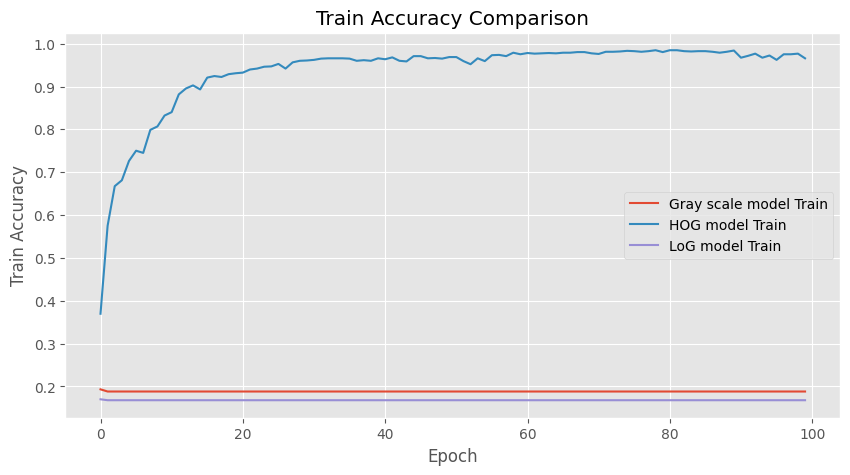

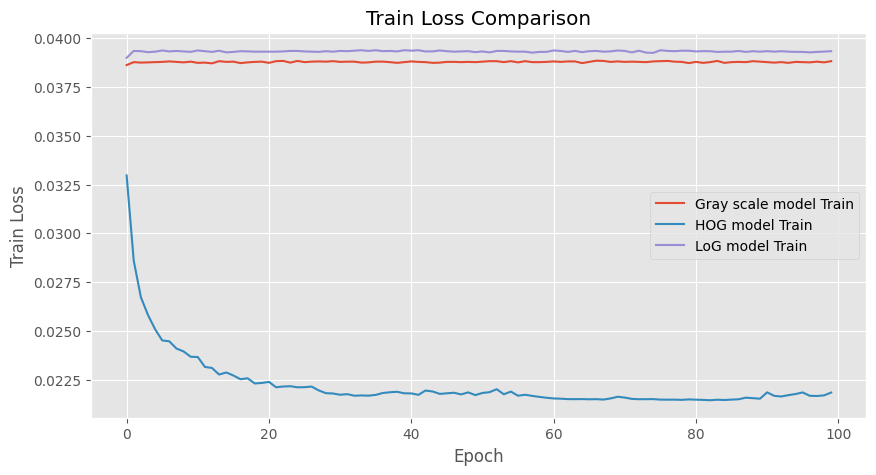

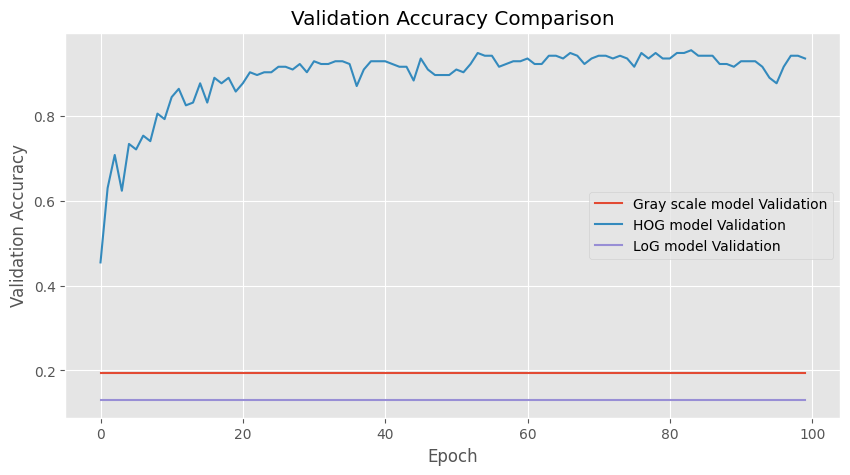

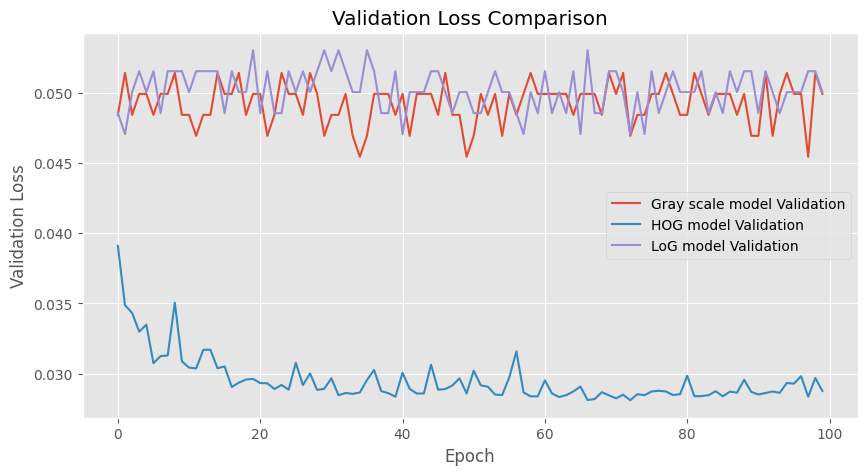

In [30]:
show_comparision(g_train_metrics, g_val_metrics, h_train_metrics, h_val_metrics, l_train_metrics, l_val_metrics)

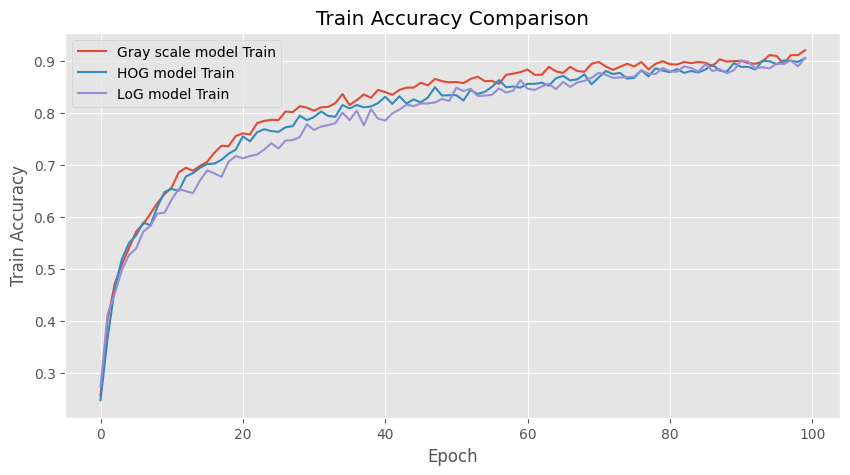

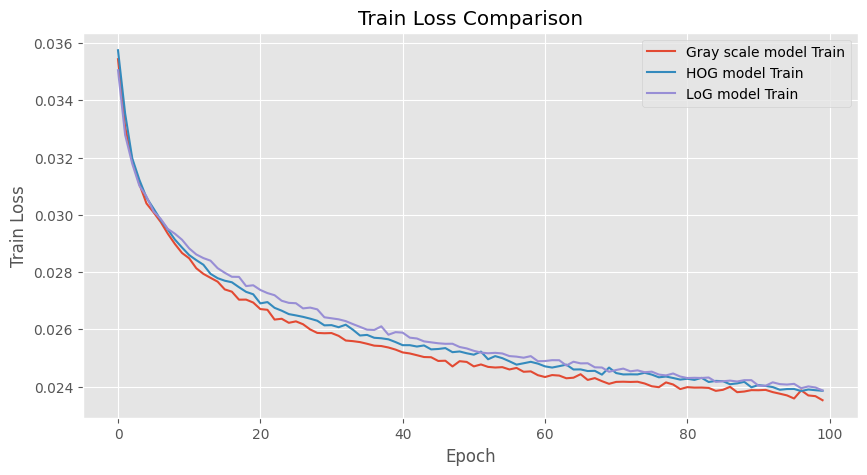

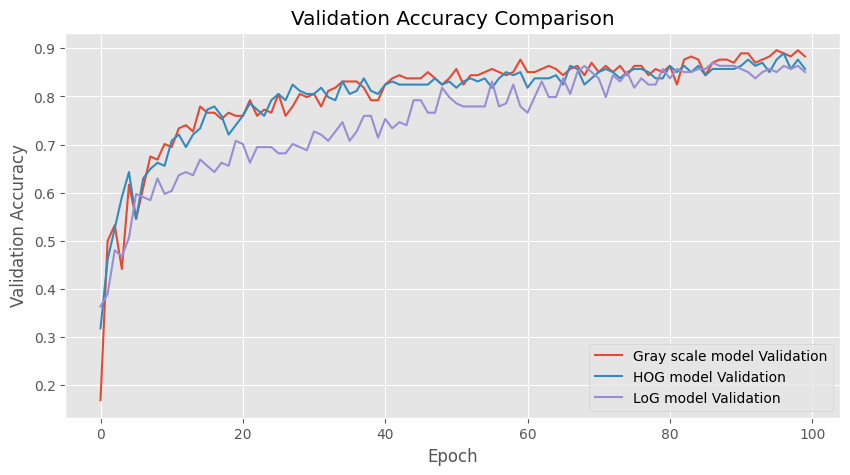

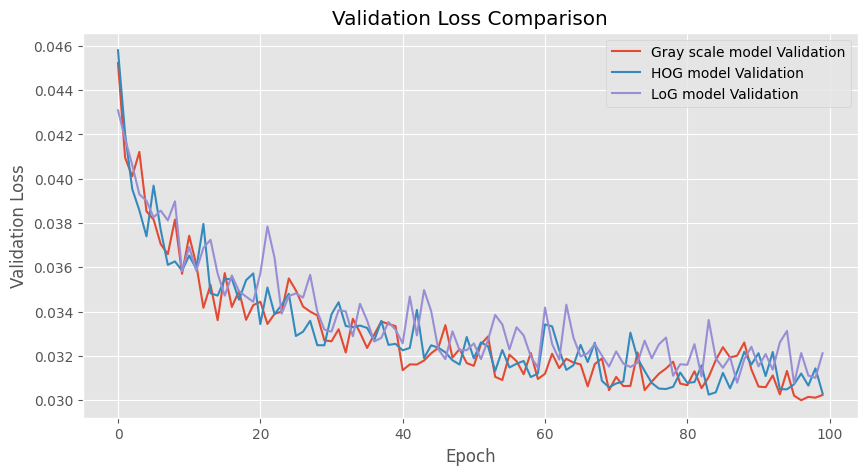

In [41]:
show_comparision(g_train_metrics2, g_val_metrics2, h_train_metrics2, h_val_metrics2, l_train_metrics2, l_val_metrics2)

# save model

In [42]:
s_h_model = Simple_CNN()
s_h_model.load_state_dict(torch.load('Simple-HoG-model.pt'))

a_g_model = Advanced_CNN()
a_g_model.load_state_dict(torch.load('A-gray-model.pt'))

a_h_model = Advanced_CNN()
a_h_model.load_state_dict(torch.load('A-HoG-model.pt'))

a_l_model = Advanced_CNN()
a_l_model.load_state_dict(torch.load('A-LoG-model.pt'))

<All keys matched successfully>

# Test dataset

In [43]:
data = pd.read_csv(r'test\_annotations.csv')

folder_path = r'test'

def load_image(file_name):
    image_path = os.path.join(folder_path, file_name)
    image = cv2.imread(image_path)
    return image

data['image'] = data['filename'].apply(load_image)

In [44]:
data = data.dropna(subset=['image'])

In [45]:
detector = handDetector()

data['rectangle'] = data['image'].apply(lambda img: cut_image_to_rectangle(img, detector))
data['points'] = data['image'].apply(lambda img: get_points(detector, img))

C:\Users\izaol\PycharmProjects\projektbigdata\venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\izaol\PycharmProjects\projektbigdata\venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


In [46]:
data = clean_Nan_value(data)
data = data.dropna(subset=['rectangle'])

C:\Users\izaol\PycharmProjects\projektbigdata\data_func.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['rectangle'] = data['rectangle'].apply(lambda x: np.nan if len(x) == 0 else x)


C:\Users\izaol\PycharmProjects\projektbigdata\tensor_data.py:138: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['image'] = data['image'].apply(small_square)
C:\Users\izaol\PycharmProjects\projektbigdata\tensor_data.py:139: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['image'] = data['image'].apply(filter)


F1-score: 0.87


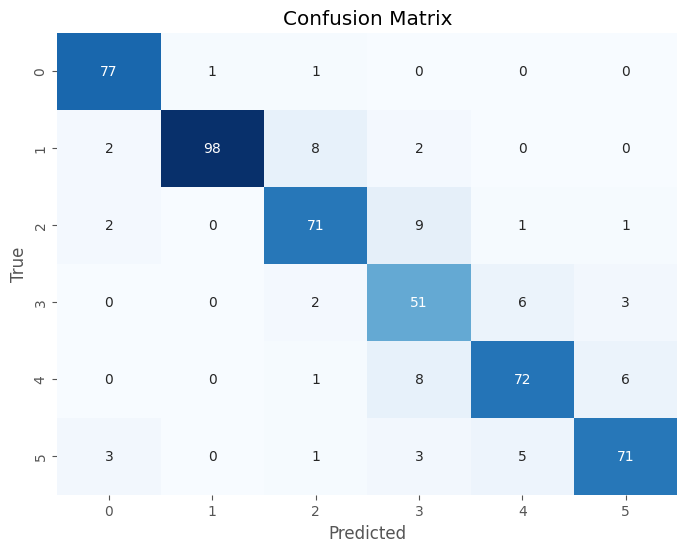

In [47]:
results, time, data_ = count_acc(data, s_h_model, hog_apply)
y_pred = [item for sublist in results for item in sublist]
count_results(y_pred, data_['class'])

C:\Users\izaol\PycharmProjects\projektbigdata\tensor_data.py:138: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['image'] = data['image'].apply(small_square)
C:\Users\izaol\PycharmProjects\projektbigdata\tensor_data.py:139: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['image'] = data['image'].apply(filter)


F1-score: 0.76


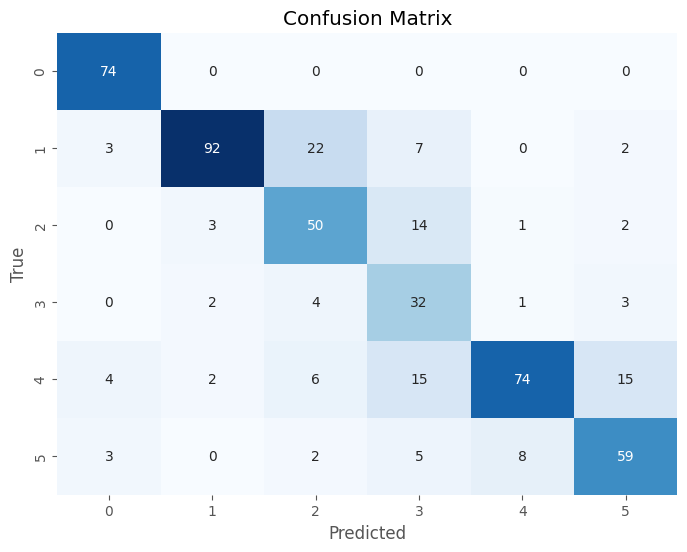

In [48]:
results, time, data_ = count_acc(data, a_h_model, hog_apply)
y_pred = [item for sublist in results for item in sublist]
count_results(y_pred, data_['class'])

C:\Users\izaol\PycharmProjects\projektbigdata\tensor_data.py:138: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['image'] = data['image'].apply(small_square)
C:\Users\izaol\PycharmProjects\projektbigdata\tensor_data.py:139: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['image'] = data['image'].apply(filter)


F1-score: 0.76


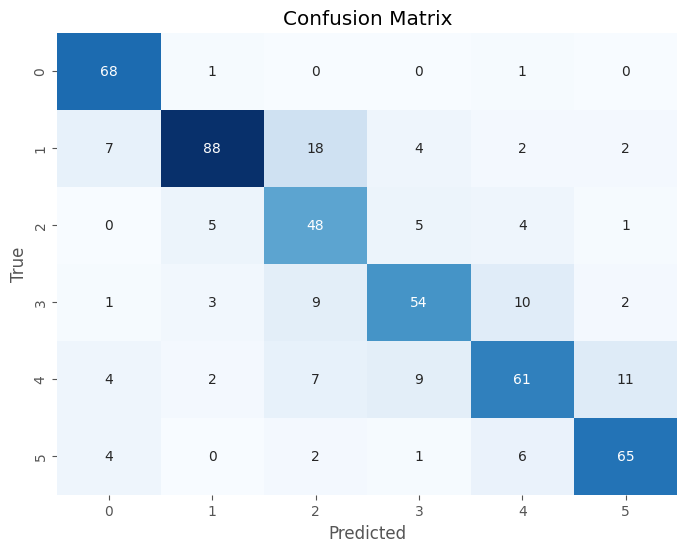

In [49]:
results, time, data_ = count_acc(data, a_l_model, laplace_opencv)
y_pred = [item for sublist in results for item in sublist]
count_results(y_pred, data_['class'])

C:\Users\izaol\PycharmProjects\projektbigdata\tensor_data.py:138: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['image'] = data['image'].apply(small_square)
C:\Users\izaol\PycharmProjects\projektbigdata\tensor_data.py:139: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['image'] = data['image'].apply(filter)


F1-score: 0.37


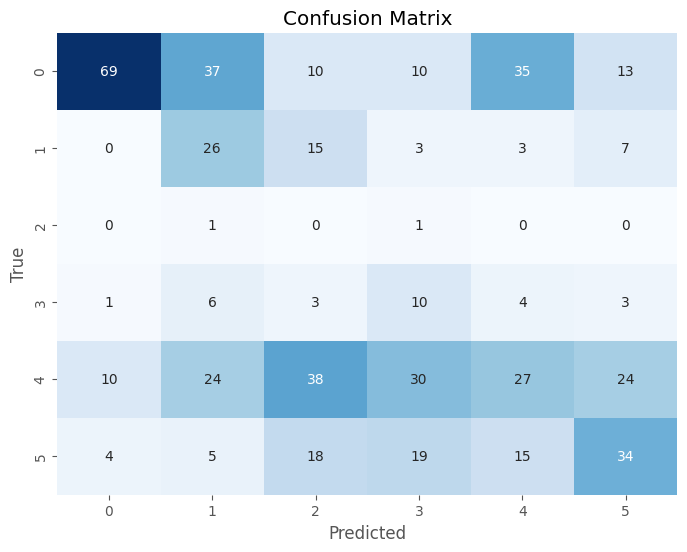

In [50]:
results, time, data_ = count_acc(data, a_g_model, get_grayscale)
y_pred = [item for sublist in results for item in sublist]
count_results(y_pred, data_['class'])